# PersonaNet

In [1]:
import numpy as np
import pandas as pd
import os
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import ReLU, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, Concatenate, Input, Flatten, Reshape

In [2]:
labels = pd.read_excel('Dataset/data_mini.xlsx')
print(labels.shape)
labels.head()

(125, 15)


,Number ID,Name,Age,Gender,Qualifiaction,A (Raw),C(Raw),E (Raw),O (Raw),N (Raw),A (T score),C(T score),E(T score),O (T score),N (T score)
0,1000,Subhi Jain,19,F,Under Grad,26,45,45,40,28,34,67,74,73,55
1,1001,Simran,20,F,Under Grad,40,38,38,36,39,63,55,67,66,66
2,1002,Romy Kumari,19,F,Under Grad,38,40,47,39,42,59,58,74,71,69
3,1003,Aditya,19,M,Under Grad,39,33,32,44,35,64,49,57,74,72
4,1004,Surmai,20,F,Under Grad,42,34,44,42,46,67,48,74,74,73


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206373F6780>,
      dtype=object)

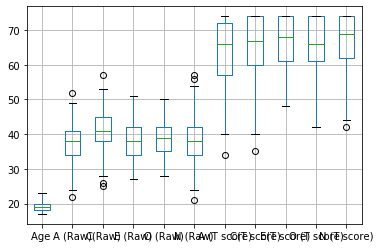

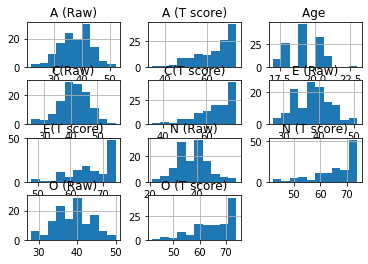

In [3]:
df = labels.copy()
vis = df.drop('Number ID ', axis = 1)
import matplotlib.pyplot as plt
vis.boxplot()
vis.hist()

### Load Images

In [4]:
p_list = os.listdir('Dataset/para')
t_list = os.listdir('Dataset/t')
print(len(p_list), len(t_list))

122 123


In [5]:
img_size = 24

### Load Labels

In [6]:
com_ls = []
id_ls = labels['Number ID ']
feat = []
for image in p_list:
    for ID in id_ls:
        for t in t_list:
            name = image.split('.')[0]
            nt = t.split('.')[0]
            if str(int(ID)) == name and str(int(ID)) == nt:
                try:
                    com_ls.append(name)
                    imgt = cv2.imread('Dataset/t/' + t, 0)
                    imgt = cv2.resize(imgt, (img_size, img_size))
                    imgp = cv2.imread('Dataset/para/' + image, 0)
                    imgp = cv2.resize(imgp, (img_size, img_size))
                    feat.append(np.array([imgt, imgp]))
                except:
                    print('Dataset/t/' + image)
                    print(imgt.shape, imgp.shape)
feat = np.array(feat, dtype = np.float32)
feat /= 255.0

In [7]:
lab = []
for x in com_ls:
    z = df.loc[df['Number ID '] == float(x)]
    if z.values != []:
        lab.append(np.array(z.values[0][5:]))
lab = np.array(lab)
print(lab.shape)

(122, 10)


D:\Anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [8]:
lab = np.array(lab)
lab = lab[..., 5:]

In [9]:
feat.shape, lab.shape

((122, 2, 24, 24), (122, 5))

## Convert Labels to Categorical Labels

In [10]:
#ACEON
for i in range(len(lab)):
    if(lab[i][4]>=26 and lab[i][4]<=34):
        lab[i][4]=0
        
    elif(lab[i][4]>=35 and lab[i][4]<=44):
        lab[i][4]=1
        
    elif(lab[i][4]>=45 and lab[i][4]<=55):
        lab[i][4]=2
        
    elif(lab[i][4]>=56 and lab[i][4]<=65):
        lab[i][4]=3
     
    elif(lab[i][4]>=66 and lab[i][4]<=74):
        lab[i][4]=4
        
    
        
    
    if(lab[i][2]>=26 and lab[i][2]<=34):
        lab[i][2]=0
        
    elif(lab[i][2]>=35 and lab[i][2]<=44):
        lab[i][2]=1
        
    elif(lab[i][2]>=45 and lab[i][2]<=55):
        lab[i][2]=2
        
    elif(lab[i][2]>=56 and lab[i][2]<=65):
        lab[i][2]=3
        
    elif(lab[i][2]>=66 and lab[i][2]<=74):
        lab[i][2]=4
    
    
    
    if(lab[i][3]>=26 and lab[i][3]<=34):
        lab[i][3]=0
        
    elif(lab[i][3]>=35 and lab[i][3]<=44):
        lab[i][3]=1
        
    elif(lab[i][3]>=45 and lab[i][3]<=55):
        lab[i][3]=2
        
    elif(lab[i][3]>=56 and lab[i][3]<=65):
        lab[i][3]=3
        
    elif(lab[i][3]>=66 and lab[i][3]<=74):
        lab[i][3]=4
    
        
    
    if(lab[i][0]>=26 and lab[i][0]<=34):
        lab[i][0]=0
        
    elif(lab[i][0]>=35 and lab[i][0]<=44):
        lab[i][0]=1
        
    elif(lab[i][0]>=45 and lab[i][0]<=55):
        lab[i][0]=2
        
    elif(lab[i][0]>=56 and lab[i][0]<=65):
        lab[i][0]=3
        
    elif(lab[i][0]>=66 and lab[i][0]<=74):
        lab[i][0]=4
        
   
 
    if(lab[i][1]>=26 and lab[i][1]<=34):
        lab[i][1]=0
        
    elif(lab[i][1]>=35 and lab[i][1]<=44):
        lab[i][1]=1
        
    elif(lab[i][1]>=45 and lab[i][1]<=55):
        lab[i][1]=2
        
    elif(lab[i][1]>=56 and lab[i][1]<=65):
        lab[i][1]=3
        
    elif(lab[i][1]>=66 and lab[i][1]<=74):
        lab[i][1]=4

In [11]:
print(lab.shape)

(122, 5)


In [12]:
#Output Shape: [?, 5, 5]
#One Hot Encode Labels
from sklearn.preprocessing import OneHotEncoder
test = lab.copy()
ohe = OneHotEncoder(sparse = False)
ohe.fit(test.reshape(-1, 1))
op = ohe.transform(test.reshape(-1, 1))
op = op.reshape((-1, 5, 5))
print(op.shape)

(122, 5, 5)


D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
lab_e = op.copy()

In [14]:
feat = np.expand_dims(feat, axis = 4)

In [15]:
t = feat[:, 0, :, :]
print(t.shape)
p = feat[:, 1, :, :]
print(p.shape)

(122, 24, 24, 1)
(122, 24, 24, 1)


In [16]:
lab_e = op.copy()

## Generate Training and Testing Set

In [17]:
feat = np.expand_dims(feat, axis = 4)

In [18]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, lab_train, lab_test = train_test_split(feat, lab_e, test_size = 0.4, shuffle = True) 
tr = feat_train[:, 0, :, :]
pr = feat_train[:, 1, :, :]
tt = feat_test[:, 0, :, :]
pt = feat_test[:, 1, :, :]

In [19]:
print(feat_train.shape, lab_train.shape)

(73, 2, 24, 24, 1, 1) (73, 5, 5)


## Define Model Architecture

In [20]:
def my_acc(pred, lab_test):
    ps = []
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            ps.append(np.argmax(pred[i][j]))
    ps = np.reshape(ps, (-1, 5))

    ls = []
    for i in range(lab_test.shape[0]):
        ls.append(ohe.inverse_transform(lab_test[0]))
    ls = np.reshape(ls, (-1, 5))
    
    ps = np.array(ps.flatten(), dtype = np.int64)
    ls = np.array(ls.flatten(), dtype = np.int64)

    ctr = 0
    for i in range(len(ps)):
        if ps[i] == ls[i]:
            ctr += 1
    return (ctr/float(len(ps)))

def p_acc(pred, lab_test):
    acc = tf.py_func(my_acc, [pred, lab_test], np.float64)
    return acc

In [21]:
inp_t = Input(shape = (24, 24, 1, ))
x = Conv2D(4, (3, 3), strides = 2, activation = 'relu')(inp_t)

conv2 = Conv2D(16, (3, 3), strides = 2, activation = 'relu')(x)

inp_p = Input(shape = (24, 24, 1, ))
y = Conv2D(4, (3, 3), strides = 2, activation = 'relu')(inp_p)

conv4 = Conv2D(16, (3, 3), strides = 2, activation = 'relu')(y)

flat_x = Flatten()(conv2)
flat_y = Flatten()(conv4)

concat = Concatenate()([flat_x, flat_y])
concat = ReLU()(concat)

b_n5 = BatchNormalization(name = 'b5')(concat)
d5 = Dropout(rate = 0.5)(b_n5)

output = Dense(25, activation = 'relu')(d5)
b_n6 = BatchNormalization(name = 'b6')(output)
d6 = Dropout(rate = 0.5)(b_n6)

output = Reshape((5, 5, ))(d6)
output = ReLU()(output)
output = Dropout(rate = 0.5)(output)

b_n7 = BatchNormalization(name = 'b7')(output)
output = sigmoid(output)

In [22]:
model = Model(inputs = [inp_t, inp_p], outputs = output)
prec = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()
model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['acc', prec, rec])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 24, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 24, 24, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 11, 11, 4)    40          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 11, 11, 4)    40          input_2[0][0]                    
______________________________________________________________________________________________

## Train Model

In [53]:
import matplotlib.pyplot as plt
hist = model.fit([tr, pr], lab_train, epochs = 2000, validation_data= [[tt, pt], lab_test], shuffle = True, batch_size = 16, verbose = True)

Train on 85 samples, validate on 37 samples
Epoch 1/2000
85/85 [==============================] - 0s 6ms/sample - loss: 1.6288 - acc: 0.0541 - precision_3: 0.1848 - recall_3: 0.0800 - val_loss: 1.6147 - val_acc: 0.0541 - val_precision_3: 0.1875 - val_recall_3: 0.3081
Epoch 2/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.6310 - acc: 0.0541 - precision_3: 0.1620 - recall_3: 0.0682 - val_loss: 1.6139 - val_acc: 0.0378 - val_precision_3: 0.1780 - val_recall_3: 0.2270
Epoch 3/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.6149 - acc: 0.0847 - precision_3: 0.2251 - recall_3: 0.1012 - val_loss: 1.6129 - val_acc: 0.0378 - val_precision_3: 0.1459 - val_recall_3: 0.1459
Epoch 4/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.6253 - acc: 0.0659 - precision_3: 0.1882 - recall_3: 0.0824 - val_loss: 1.6118 - val_acc: 0.0324 - val_precision_3: 0.1206 - val_recall_3: 0.0919
Epoch 5/2000
85/85 [==============================] - 

Epoch 37/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.6149 - acc: 0.0824 - precision_3: 0.2349 - recall_3: 0.0918 - val_loss: 1.6092 - val_acc: 0.0108 - val_precision_3: 1.0000 - val_recall_3: 0.0054
Epoch 38/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.6115 - acc: 0.0894 - precision_3: 0.2263 - recall_3: 0.1012 - val_loss: 1.6092 - val_acc: 0.0108 - val_precision_3: 1.0000 - val_recall_3: 0.0054
Epoch 39/2000
85/85 [==============================] - 0s 482us/sample - loss: 1.6323 - acc: 0.0588 - precision_3: 0.1780 - recall_3: 0.0800 - val_loss: 1.6091 - val_acc: 0.0108 - val_precision_3: 1.0000 - val_recall_3: 0.0054
Epoch 40/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.6231 - acc: 0.0682 - precision_3: 0.1946 - recall_3: 0.0847 - val_loss: 1.6091 - val_acc: 0.0108 - val_precision_3: 0.5000 - val_recall_3: 0.0054
Epoch 41/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.6307 - acc:

85/85 [==============================] - 0s 516us/sample - loss: 1.6114 - acc: 0.0729 - precision_3: 0.2372 - recall_3: 0.0871 - val_loss: 1.5940 - val_acc: 0.1946 - val_precision_3: 0.2674 - val_recall_3: 0.2703
Epoch 110/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.6159 - acc: 0.0824 - precision_3: 0.2296 - recall_3: 0.1059 - val_loss: 1.5941 - val_acc: 0.1946 - val_precision_3: 0.2660 - val_recall_3: 0.2703
Epoch 111/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.6129 - acc: 0.0894 - precision_3: 0.2458 - recall_3: 0.1035 - val_loss: 1.5935 - val_acc: 0.1946 - val_precision_3: 0.2646 - val_recall_3: 0.2703
Epoch 112/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.6088 - acc: 0.0871 - precision_3: 0.2638 - recall_3: 0.1012 - val_loss: 1.5935 - val_acc: 0.1946 - val_precision_3: 0.2646 - val_recall_3: 0.2703
Epoch 113/2000
85/85 [==============================] - 0s 516us/sample - loss: 1.6082 - acc: 0.0847 - 

Epoch 145/2000
85/85 [==============================] - 0s 469us/sample - loss: 1.6041 - acc: 0.1059 - precision_3: 0.2686 - recall_3: 0.1106 - val_loss: 1.5743 - val_acc: 0.2757 - val_precision_3: 0.2927 - val_recall_3: 0.3892
Epoch 146/2000
85/85 [==============================] - 0s 469us/sample - loss: 1.5892 - acc: 0.1176 - precision_3: 0.3179 - recall_3: 0.1294 - val_loss: 1.5741 - val_acc: 0.2811 - val_precision_3: 0.2939 - val_recall_3: 0.3892
Epoch 147/2000
85/85 [==============================] - 0s 481us/sample - loss: 1.5989 - acc: 0.0988 - precision_3: 0.2899 - recall_3: 0.1153 - val_loss: 1.5753 - val_acc: 0.2703 - val_precision_3: 0.2910 - val_recall_3: 0.3838
Epoch 148/2000
85/85 [==============================] - 0s 492us/sample - loss: 1.5961 - acc: 0.1129 - precision_3: 0.2898 - recall_3: 0.1200 - val_loss: 1.5773 - val_acc: 0.2595 - val_precision_3: 0.2922 - val_recall_3: 0.3838
Epoch 149/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5972 -

Epoch 181/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5971 - acc: 0.1106 - precision_3: 0.2971 - recall_3: 0.1224 - val_loss: 1.5725 - val_acc: 0.2811 - val_precision_3: 0.2982 - val_recall_3: 0.3676
Epoch 182/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5935 - acc: 0.1129 - precision_3: 0.3091 - recall_3: 0.1200 - val_loss: 1.5712 - val_acc: 0.2811 - val_precision_3: 0.3043 - val_recall_3: 0.3784
Epoch 183/2000
85/85 [==============================] - 0s 493us/sample - loss: 1.6004 - acc: 0.1059 - precision_3: 0.2682 - recall_3: 0.1129 - val_loss: 1.5704 - val_acc: 0.2703 - val_precision_3: 0.3030 - val_recall_3: 0.3784
Epoch 184/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.6077 - acc: 0.0871 - precision_3: 0.2625 - recall_3: 0.0988 - val_loss: 1.5697 - val_acc: 0.2811 - val_precision_3: 0.3074 - val_recall_3: 0.3838
Epoch 185/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5988 -

Epoch 217/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5906 - acc: 0.1176 - precision_3: 0.3293 - recall_3: 0.1294 - val_loss: 1.5645 - val_acc: 0.3297 - val_precision_3: 0.3649 - val_recall_3: 0.4378
Epoch 218/2000
85/85 [==============================] - 0s 493us/sample - loss: 1.5768 - acc: 0.1247 - precision_3: 0.3663 - recall_3: 0.1482 - val_loss: 1.5642 - val_acc: 0.3351 - val_precision_3: 0.3620 - val_recall_3: 0.4324
Epoch 219/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5934 - acc: 0.1106 - precision_3: 0.2970 - recall_3: 0.1153 - val_loss: 1.5645 - val_acc: 0.3405 - val_precision_3: 0.3616 - val_recall_3: 0.4378
Epoch 220/2000
85/85 [==============================] - 0s 504us/sample - loss: 1.6007 - acc: 0.0988 - precision_3: 0.2848 - recall_3: 0.1106 - val_loss: 1.5640 - val_acc: 0.3243 - val_precision_3: 0.3612 - val_recall_3: 0.4432
Epoch 221/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.6062 -

Epoch 253/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5913 - acc: 0.1176 - precision_3: 0.3216 - recall_3: 0.1294 - val_loss: 1.5541 - val_acc: 0.3405 - val_precision_3: 0.3710 - val_recall_3: 0.4432
Epoch 254/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5763 - acc: 0.1412 - precision_3: 0.3815 - recall_3: 0.1553 - val_loss: 1.5528 - val_acc: 0.3459 - val_precision_3: 0.3710 - val_recall_3: 0.4432
Epoch 255/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5812 - acc: 0.1294 - precision_3: 0.3352 - recall_3: 0.1412 - val_loss: 1.5519 - val_acc: 0.3459 - val_precision_3: 0.3710 - val_recall_3: 0.4432
Epoch 256/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5816 - acc: 0.1318 - precision_3: 0.3464 - recall_3: 0.1459 - val_loss: 1.5511 - val_acc: 0.3405 - val_precision_3: 0.3670 - val_recall_3: 0.4324
Epoch 257/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5935 -

Epoch 289/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5998 - acc: 0.0941 - precision_3: 0.2814 - recall_3: 0.1106 - val_loss: 1.5641 - val_acc: 0.3243 - val_precision_3: 0.3671 - val_recall_3: 0.4108
Epoch 290/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5806 - acc: 0.1200 - precision_3: 0.3642 - recall_3: 0.1294 - val_loss: 1.5645 - val_acc: 0.3351 - val_precision_3: 0.3750 - val_recall_3: 0.4216
Epoch 291/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5926 - acc: 0.1176 - precision_3: 0.2989 - recall_3: 0.1294 - val_loss: 1.5648 - val_acc: 0.3351 - val_precision_3: 0.3768 - val_recall_3: 0.4216
Epoch 292/2000
85/85 [==============================] - 0s 668us/sample - loss: 1.5890 - acc: 0.1129 - precision_3: 0.3714 - recall_3: 0.1224 - val_loss: 1.5650 - val_acc: 0.3351 - val_precision_3: 0.3835 - val_recall_3: 0.4270
Epoch 293/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5825 -

Epoch 325/2000
85/85 [==============================] - 0s 469us/sample - loss: 1.5869 - acc: 0.1082 - precision_3: 0.3517 - recall_3: 0.1200 - val_loss: 1.5555 - val_acc: 0.3514 - val_precision_3: 0.4057 - val_recall_3: 0.4649
Epoch 326/2000
85/85 [==============================] - 0s 504us/sample - loss: 1.5879 - acc: 0.1035 - precision_3: 0.3618 - recall_3: 0.1294 - val_loss: 1.5561 - val_acc: 0.3514 - val_precision_3: 0.4038 - val_recall_3: 0.4649
Epoch 327/2000
85/85 [==============================] - 0s 493us/sample - loss: 1.5906 - acc: 0.1106 - precision_3: 0.3427 - recall_3: 0.1153 - val_loss: 1.5563 - val_acc: 0.3405 - val_precision_3: 0.4028 - val_recall_3: 0.4595
Epoch 328/2000
85/85 [==============================] - 0s 516us/sample - loss: 1.5835 - acc: 0.1082 - precision_3: 0.3836 - recall_3: 0.1318 - val_loss: 1.5548 - val_acc: 0.3351 - val_precision_3: 0.4058 - val_recall_3: 0.4541
Epoch 329/2000
85/85 [==============================] - 0s 504us/sample - loss: 1.5833 -

Epoch 361/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5877 - acc: 0.1129 - precision_3: 0.3514 - recall_3: 0.1224 - val_loss: 1.5475 - val_acc: 0.3838 - val_precision_3: 0.4095 - val_recall_3: 0.4649
Epoch 362/2000
85/85 [==============================] - 0s 492us/sample - loss: 1.5606 - acc: 0.1600 - precision_3: 0.4684 - recall_3: 0.1741 - val_loss: 1.5487 - val_acc: 0.3784 - val_precision_3: 0.4190 - val_recall_3: 0.4757
Epoch 363/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5658 - acc: 0.1506 - precision_3: 0.4277 - recall_3: 0.1600 - val_loss: 1.5486 - val_acc: 0.3838 - val_precision_3: 0.4206 - val_recall_3: 0.4865
Epoch 364/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5665 - acc: 0.1506 - precision_3: 0.4416 - recall_3: 0.1600 - val_loss: 1.5494 - val_acc: 0.3892 - val_precision_3: 0.4167 - val_recall_3: 0.4865
Epoch 365/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5778 -

Epoch 397/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5664 - acc: 0.1412 - precision_3: 0.4648 - recall_3: 0.1553 - val_loss: 1.5526 - val_acc: 0.3784 - val_precision_3: 0.4439 - val_recall_3: 0.4486
Epoch 398/2000
85/85 [==============================] - 0s 645us/sample - loss: 1.5837 - acc: 0.1176 - precision_3: 0.3830 - recall_3: 0.1271 - val_loss: 1.5506 - val_acc: 0.3892 - val_precision_3: 0.4497 - val_recall_3: 0.4595
Epoch 399/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5688 - acc: 0.1271 - precision_3: 0.4370 - recall_3: 0.1388 - val_loss: 1.5503 - val_acc: 0.3838 - val_precision_3: 0.4415 - val_recall_3: 0.4486
Epoch 400/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5644 - acc: 0.1482 - precision_3: 0.4323 - recall_3: 0.1576 - val_loss: 1.5515 - val_acc: 0.3784 - val_precision_3: 0.4362 - val_recall_3: 0.4432
Epoch 401/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5743 -

Epoch 433/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5549 - acc: 0.1694 - precision_3: 0.4512 - recall_3: 0.1741 - val_loss: 1.5505 - val_acc: 0.3946 - val_precision_3: 0.4485 - val_recall_3: 0.4703
Epoch 434/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5635 - acc: 0.1482 - precision_3: 0.4755 - recall_3: 0.1600 - val_loss: 1.5505 - val_acc: 0.3946 - val_precision_3: 0.4508 - val_recall_3: 0.4703
Epoch 435/2000
85/85 [==============================] - 0s 481us/sample - loss: 1.5477 - acc: 0.1812 - precision_3: 0.5122 - recall_3: 0.1976 - val_loss: 1.5506 - val_acc: 0.3946 - val_precision_3: 0.4555 - val_recall_3: 0.4703
Epoch 436/2000
85/85 [==============================] - 0s 517us/sample - loss: 1.5576 - acc: 0.1576 - precision_3: 0.5182 - recall_3: 0.1671 - val_loss: 1.5503 - val_acc: 0.3838 - val_precision_3: 0.4579 - val_recall_3: 0.4703
Epoch 437/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5698 -

Epoch 504/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5607 - acc: 0.1482 - precision_3: 0.4752 - recall_3: 0.1576 - val_loss: 1.5463 - val_acc: 0.3676 - val_precision_3: 0.4385 - val_recall_3: 0.4432
Epoch 505/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5557 - acc: 0.1459 - precision_3: 0.5462 - recall_3: 0.1529 - val_loss: 1.5450 - val_acc: 0.3730 - val_precision_3: 0.4392 - val_recall_3: 0.4486
Epoch 506/2000
85/85 [==============================] - 0s 516us/sample - loss: 1.5639 - acc: 0.1388 - precision_3: 0.5000 - recall_3: 0.1412 - val_loss: 1.5443 - val_acc: 0.4000 - val_precision_3: 0.4536 - val_recall_3: 0.4757
Epoch 507/2000
85/85 [==============================] - ETA: 0s - loss: 1.5641 - acc: 0.1375 - precision_3: 0.5714 - recall_3: 0.15 - 0s 516us/sample - loss: 1.5484 - acc: 0.1576 - precision_3: 0.5748 - recall_3: 0.1718 - val_loss: 1.5447 - val_acc: 0.4108 - val_precision_3: 0.4639 - val_recall_3: 0.4865
Epoch 508/

Epoch 540/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5518 - acc: 0.1600 - precision_3: 0.5645 - recall_3: 0.1647 - val_loss: 1.5341 - val_acc: 0.4324 - val_precision_3: 0.4697 - val_recall_3: 0.5027
Epoch 541/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5446 - acc: 0.1741 - precision_3: 0.5704 - recall_3: 0.1906 - val_loss: 1.5341 - val_acc: 0.4324 - val_precision_3: 0.4694 - val_recall_3: 0.4973
Epoch 542/2000
85/85 [==============================] - 0s 704us/sample - loss: 1.5529 - acc: 0.1600 - precision_3: 0.5299 - recall_3: 0.1671 - val_loss: 1.5344 - val_acc: 0.4378 - val_precision_3: 0.4769 - val_recall_3: 0.5027
Epoch 543/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5468 - acc: 0.1741 - precision_3: 0.5486 - recall_3: 0.1859 - val_loss: 1.5353 - val_acc: 0.4486 - val_precision_3: 0.4794 - val_recall_3: 0.5027
Epoch 544/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5572 -

Epoch 611/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5464 - acc: 0.1647 - precision_3: 0.5950 - recall_3: 0.1694 - val_loss: 1.5346 - val_acc: 0.4378 - val_precision_3: 0.4870 - val_recall_3: 0.5081
Epoch 612/2000
85/85 [==============================] - 0s 564us/sample - loss: 1.5472 - acc: 0.1482 - precision_3: 0.6535 - recall_3: 0.1553 - val_loss: 1.5346 - val_acc: 0.4432 - val_precision_3: 0.4794 - val_recall_3: 0.5027
Epoch 613/2000
85/85 [==============================] - 0s 611us/sample - loss: 1.5635 - acc: 0.1294 - precision_3: 0.5577 - recall_3: 0.1365 - val_loss: 1.5347 - val_acc: 0.4432 - val_precision_3: 0.4821 - val_recall_3: 0.5081
Epoch 614/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5454 - acc: 0.1671 - precision_3: 0.5649 - recall_3: 0.1741 - val_loss: 1.5326 - val_acc: 0.4486 - val_precision_3: 0.4819 - val_recall_3: 0.5027
Epoch 615/2000
85/85 [==============================] - 0s 680us/sample - loss: 1.5417 -

Epoch 647/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5641 - acc: 0.1247 - precision_3: 0.5081 - recall_3: 0.1482 - val_loss: 1.5160 - val_acc: 0.4757 - val_precision_3: 0.5074 - val_recall_3: 0.5568
Epoch 648/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5534 - acc: 0.1624 - precision_3: 0.5854 - recall_3: 0.1694 - val_loss: 1.5151 - val_acc: 0.4703 - val_precision_3: 0.5024 - val_recall_3: 0.5568
Epoch 649/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5398 - acc: 0.1859 - precision_3: 0.5870 - recall_3: 0.1906 - val_loss: 1.5141 - val_acc: 0.4757 - val_precision_3: 0.4976 - val_recall_3: 0.5514
Epoch 650/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5605 - acc: 0.1365 - precision_3: 0.5478 - recall_3: 0.1482 - val_loss: 1.5139 - val_acc: 0.4757 - val_precision_3: 0.4928 - val_recall_3: 0.5514
Epoch 651/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5572 -

Epoch 683/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5567 - acc: 0.1459 - precision_3: 0.5789 - recall_3: 0.1553 - val_loss: 1.5342 - val_acc: 0.4324 - val_precision_3: 0.5026 - val_recall_3: 0.5297
Epoch 684/2000
85/85 [==============================] - 0s 564us/sample - loss: 1.5240 - acc: 0.2165 - precision_3: 0.7045 - recall_3: 0.2188 - val_loss: 1.5338 - val_acc: 0.4324 - val_precision_3: 0.5104 - val_recall_3: 0.5297
Epoch 685/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5483 - acc: 0.1671 - precision_3: 0.5564 - recall_3: 0.1741 - val_loss: 1.5347 - val_acc: 0.4378 - val_precision_3: 0.5130 - val_recall_3: 0.5351
Epoch 686/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5548 - acc: 0.1435 - precision_3: 0.5752 - recall_3: 0.1529 - val_loss: 1.5334 - val_acc: 0.4432 - val_precision_3: 0.5294 - val_recall_3: 0.5351
Epoch 687/2000
85/85 [==============================] - 0s 564us/sample - loss: 1.5324 -

Epoch 719/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5539 - acc: 0.1435 - precision_3: 0.5366 - recall_3: 0.1553 - val_loss: 1.5249 - val_acc: 0.4541 - val_precision_3: 0.5233 - val_recall_3: 0.5459
Epoch 720/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5467 - acc: 0.1624 - precision_3: 0.6134 - recall_3: 0.1718 - val_loss: 1.5246 - val_acc: 0.4595 - val_precision_3: 0.5155 - val_recall_3: 0.5405
Epoch 721/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5443 - acc: 0.1671 - precision_3: 0.6239 - recall_3: 0.1718 - val_loss: 1.5242 - val_acc: 0.4595 - val_precision_3: 0.5102 - val_recall_3: 0.5405
Epoch 722/2000
85/85 [==============================] - 0s 539us/sample - loss: 1.5495 - acc: 0.1624 - precision_3: 0.6216 - recall_3: 0.1624 - val_loss: 1.5232 - val_acc: 0.4595 - val_precision_3: 0.5127 - val_recall_3: 0.5459
Epoch 723/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5434 -

Epoch 755/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5496 - acc: 0.1576 - precision_3: 0.6034 - recall_3: 0.1647 - val_loss: 1.5229 - val_acc: 0.4595 - val_precision_3: 0.5158 - val_recall_3: 0.5297
Epoch 756/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5303 - acc: 0.1835 - precision_3: 0.6838 - recall_3: 0.1882 - val_loss: 1.5237 - val_acc: 0.4595 - val_precision_3: 0.5185 - val_recall_3: 0.5297
Epoch 757/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5402 - acc: 0.1788 - precision_3: 0.6031 - recall_3: 0.1859 - val_loss: 1.5232 - val_acc: 0.4595 - val_precision_3: 0.5158 - val_recall_3: 0.5297
Epoch 758/2000
85/85 [==============================] - 0s 564us/sample - loss: 1.5526 - acc: 0.1529 - precision_3: 0.5965 - recall_3: 0.1600 - val_loss: 1.5216 - val_acc: 0.4595 - val_precision_3: 0.5130 - val_recall_3: 0.5351
Epoch 759/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5364 -

Epoch 791/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5462 - acc: 0.1600 - precision_3: 0.6449 - recall_3: 0.1624 - val_loss: 1.5140 - val_acc: 0.4811 - val_precision_3: 0.5337 - val_recall_3: 0.5568
Epoch 792/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5436 - acc: 0.1600 - precision_3: 0.6604 - recall_3: 0.1647 - val_loss: 1.5138 - val_acc: 0.4811 - val_precision_3: 0.5337 - val_recall_3: 0.5568
Epoch 793/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5468 - acc: 0.1624 - precision_3: 0.6034 - recall_3: 0.1647 - val_loss: 1.5122 - val_acc: 0.4811 - val_precision_3: 0.5361 - val_recall_3: 0.5622
Epoch 794/2000
85/85 [==============================] - 0s 539us/sample - loss: 1.5280 - acc: 0.2024 - precision_3: 0.6953 - recall_3: 0.2094 - val_loss: 1.5109 - val_acc: 0.4811 - val_precision_3: 0.5361 - val_recall_3: 0.5622
Epoch 795/2000
85/85 [==============================] - 0s 574us/sample - loss: 1.5319 -

Epoch 827/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5545 - acc: 0.1412 - precision_3: 0.6139 - recall_3: 0.1459 - val_loss: 1.5295 - val_acc: 0.4486 - val_precision_3: 0.5156 - val_recall_3: 0.5351
Epoch 828/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5308 - acc: 0.1929 - precision_3: 0.6855 - recall_3: 0.2000 - val_loss: 1.5297 - val_acc: 0.4432 - val_precision_3: 0.5131 - val_recall_3: 0.5297
Epoch 829/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5450 - acc: 0.1624 - precision_3: 0.6486 - recall_3: 0.1694 - val_loss: 1.5297 - val_acc: 0.4432 - val_precision_3: 0.5130 - val_recall_3: 0.5351
Epoch 830/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5388 - acc: 0.1741 - precision_3: 0.6667 - recall_3: 0.1788 - val_loss: 1.5290 - val_acc: 0.4378 - val_precision_3: 0.5104 - val_recall_3: 0.5297
Epoch 831/2000
85/85 [==============================] - 0s 645us/sample - loss: 1.5430 -

Epoch 863/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5403 - acc: 0.1718 - precision_3: 0.6496 - recall_3: 0.1788 - val_loss: 1.5112 - val_acc: 0.4757 - val_precision_3: 0.5181 - val_recall_3: 0.5405
Epoch 864/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5441 - acc: 0.1694 - precision_3: 0.6066 - recall_3: 0.1741 - val_loss: 1.5077 - val_acc: 0.4757 - val_precision_3: 0.5231 - val_recall_3: 0.5514
Epoch 865/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5365 - acc: 0.1812 - precision_3: 0.6581 - recall_3: 0.1812 - val_loss: 1.5050 - val_acc: 0.4811 - val_precision_3: 0.5202 - val_recall_3: 0.5568
Epoch 866/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5364 - acc: 0.1788 - precision_3: 0.6429 - recall_3: 0.1906 - val_loss: 1.5039 - val_acc: 0.4811 - val_precision_3: 0.5228 - val_recall_3: 0.5568
Epoch 867/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5529 -

Epoch 899/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5563 - acc: 0.1388 - precision_3: 0.5701 - recall_3: 0.1435 - val_loss: 1.5146 - val_acc: 0.4703 - val_precision_3: 0.5153 - val_recall_3: 0.5459
Epoch 900/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5353 - acc: 0.1765 - precision_3: 0.6446 - recall_3: 0.1835 - val_loss: 1.5134 - val_acc: 0.4757 - val_precision_3: 0.5179 - val_recall_3: 0.5459
Epoch 901/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5343 - acc: 0.1812 - precision_3: 0.6724 - recall_3: 0.1835 - val_loss: 1.5132 - val_acc: 0.4757 - val_precision_3: 0.5179 - val_recall_3: 0.5459
Epoch 902/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5425 - acc: 0.1718 - precision_3: 0.6757 - recall_3: 0.1765 - val_loss: 1.5140 - val_acc: 0.4703 - val_precision_3: 0.5179 - val_recall_3: 0.5459
Epoch 903/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5383 -

Epoch 935/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5326 - acc: 0.1882 - precision_3: 0.7297 - recall_3: 0.1906 - val_loss: 1.5159 - val_acc: 0.4595 - val_precision_3: 0.5158 - val_recall_3: 0.5297
Epoch 936/2000
85/85 [==============================] - 0s 574us/sample - loss: 1.5446 - acc: 0.1482 - precision_3: 0.6804 - recall_3: 0.1553 - val_loss: 1.5156 - val_acc: 0.4649 - val_precision_3: 0.5158 - val_recall_3: 0.5297
Epoch 937/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5301 - acc: 0.1882 - precision_3: 0.6587 - recall_3: 0.1953 - val_loss: 1.5150 - val_acc: 0.4703 - val_precision_3: 0.5211 - val_recall_3: 0.5351
Epoch 938/2000
85/85 [==============================] - 0s 611us/sample - loss: 1.5398 - acc: 0.1765 - precision_3: 0.6410 - recall_3: 0.1765 - val_loss: 1.5158 - val_acc: 0.4649 - val_precision_3: 0.5156 - val_recall_3: 0.5351
Epoch 939/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5264 -

Epoch 971/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5327 - acc: 0.1953 - precision_3: 0.6364 - recall_3: 0.1976 - val_loss: 1.5111 - val_acc: 0.4811 - val_precision_3: 0.5206 - val_recall_3: 0.5459
Epoch 972/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5375 - acc: 0.1718 - precision_3: 0.6387 - recall_3: 0.1788 - val_loss: 1.5113 - val_acc: 0.4811 - val_precision_3: 0.5179 - val_recall_3: 0.5459
Epoch 973/2000
85/85 [==============================] - 0s 539us/sample - loss: 1.5333 - acc: 0.1882 - precision_3: 0.6807 - recall_3: 0.1906 - val_loss: 1.5110 - val_acc: 0.4811 - val_precision_3: 0.5179 - val_recall_3: 0.5459
Epoch 974/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5156 - acc: 0.2188 - precision_3: 0.7344 - recall_3: 0.2212 - val_loss: 1.5096 - val_acc: 0.4811 - val_precision_3: 0.5206 - val_recall_3: 0.5459
Epoch 975/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5283 -

Epoch 1007/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5189 - acc: 0.2094 - precision_3: 0.7000 - recall_3: 0.2141 - val_loss: 1.5034 - val_acc: 0.4919 - val_precision_3: 0.5048 - val_recall_3: 0.5730
Epoch 1008/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5446 - acc: 0.1647 - precision_3: 0.6186 - recall_3: 0.1718 - val_loss: 1.5010 - val_acc: 0.4973 - val_precision_3: 0.5023 - val_recall_3: 0.5784
Epoch 1009/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5170 - acc: 0.2165 - precision_3: 0.7266 - recall_3: 0.2188 - val_loss: 1.4999 - val_acc: 0.4973 - val_precision_3: 0.5047 - val_recall_3: 0.5784
Epoch 1010/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5399 - acc: 0.1671 - precision_3: 0.6460 - recall_3: 0.1718 - val_loss: 1.4995 - val_acc: 0.4973 - val_precision_3: 0.5024 - val_recall_3: 0.5730
Epoch 1011/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5

Epoch 1043/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5386 - acc: 0.1718 - precision_3: 0.6696 - recall_3: 0.1765 - val_loss: 1.5168 - val_acc: 0.4757 - val_precision_3: 0.5101 - val_recall_3: 0.5459
Epoch 1044/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5367 - acc: 0.1694 - precision_3: 0.6518 - recall_3: 0.1718 - val_loss: 1.5155 - val_acc: 0.4757 - val_precision_3: 0.5101 - val_recall_3: 0.5459
Epoch 1045/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5232 - acc: 0.2000 - precision_3: 0.6797 - recall_3: 0.2047 - val_loss: 1.5143 - val_acc: 0.4757 - val_precision_3: 0.5126 - val_recall_3: 0.5514
Epoch 1046/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5266 - acc: 0.1835 - precision_3: 0.7642 - recall_3: 0.1906 - val_loss: 1.5148 - val_acc: 0.4703 - val_precision_3: 0.5102 - val_recall_3: 0.5405
Epoch 1047/2000
85/85 [==============================] - 0s 529us/sample - loss: 1.5

Epoch 1079/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5463 - acc: 0.1435 - precision_3: 0.7033 - recall_3: 0.1506 - val_loss: 1.4992 - val_acc: 0.5027 - val_precision_3: 0.5047 - val_recall_3: 0.5784
Epoch 1080/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5273 - acc: 0.1976 - precision_3: 0.6615 - recall_3: 0.2024 - val_loss: 1.4988 - val_acc: 0.5081 - val_precision_3: 0.5023 - val_recall_3: 0.5784
Epoch 1081/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5190 - acc: 0.2000 - precision_3: 0.7087 - recall_3: 0.2118 - val_loss: 1.5004 - val_acc: 0.5081 - val_precision_3: 0.5047 - val_recall_3: 0.5784
Epoch 1082/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5184 - acc: 0.2212 - precision_3: 0.7007 - recall_3: 0.2259 - val_loss: 1.5039 - val_acc: 0.4919 - val_precision_3: 0.5024 - val_recall_3: 0.5622
Epoch 1083/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5

Epoch 1115/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5095 - acc: 0.2353 - precision_3: 0.7214 - recall_3: 0.2376 - val_loss: 1.5140 - val_acc: 0.4703 - val_precision_3: 0.5126 - val_recall_3: 0.5514
Epoch 1116/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5197 - acc: 0.2094 - precision_3: 0.7132 - recall_3: 0.2165 - val_loss: 1.5129 - val_acc: 0.4703 - val_precision_3: 0.5126 - val_recall_3: 0.5514
Epoch 1117/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5148 - acc: 0.2188 - precision_3: 0.7111 - recall_3: 0.2259 - val_loss: 1.5125 - val_acc: 0.4703 - val_precision_3: 0.5124 - val_recall_3: 0.5568
Epoch 1118/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5289 - acc: 0.1953 - precision_3: 0.6515 - recall_3: 0.2024 - val_loss: 1.5114 - val_acc: 0.4649 - val_precision_3: 0.5176 - val_recall_3: 0.5568
Epoch 1119/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5

Epoch 1151/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.4970 - acc: 0.2471 - precision_3: 0.7535 - recall_3: 0.2518 - val_loss: 1.5095 - val_acc: 0.4757 - val_precision_3: 0.5024 - val_recall_3: 0.5568
Epoch 1152/2000
85/85 [==============================] - 0s 504us/sample - loss: 1.5350 - acc: 0.1859 - precision_3: 0.6585 - recall_3: 0.1906 - val_loss: 1.5082 - val_acc: 0.4811 - val_precision_3: 0.4976 - val_recall_3: 0.5568
Epoch 1153/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5205 - acc: 0.2024 - precision_3: 0.7350 - recall_3: 0.2024 - val_loss: 1.5070 - val_acc: 0.4919 - val_precision_3: 0.5048 - val_recall_3: 0.5676
Epoch 1154/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5342 - acc: 0.1765 - precision_3: 0.6754 - recall_3: 0.1812 - val_loss: 1.5059 - val_acc: 0.5027 - val_precision_3: 0.5072 - val_recall_3: 0.5730
Epoch 1155/2000
85/85 [==============================] - 0s 528us/sample - loss: 1.5

85/85 [==============================] - 0s 528us/sample - loss: 1.5164 - acc: 0.2118 - precision_3: 0.7845 - recall_3: 0.2141 - val_loss: 1.5138 - val_acc: 0.4811 - val_precision_3: 0.5000 - val_recall_3: 0.5622
Epoch 1222/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5362 - acc: 0.1718 - precision_3: 0.6981 - recall_3: 0.1741 - val_loss: 1.5121 - val_acc: 0.4811 - val_precision_3: 0.5024 - val_recall_3: 0.5676
Epoch 1223/2000
85/85 [==============================] - 0s 505us/sample - loss: 1.5266 - acc: 0.1953 - precision_3: 0.7190 - recall_3: 0.2047 - val_loss: 1.5114 - val_acc: 0.4811 - val_precision_3: 0.5024 - val_recall_3: 0.5622
Epoch 1224/2000
85/85 [==============================] - ETA: 0s - loss: 1.5485 - acc: 0.1625 - precision_3: 0.6842 - recall_3: 0.16 - 0s 540us/sample - loss: 1.5329 - acc: 0.1741 - precision_3: 0.6875 - recall_3: 0.1812 - val_loss: 1.5121 - val_acc: 0.4811 - val_precision_3: 0.5024 - val_recall_3: 0.5622
Epoch 1225/2000
85/85 

Epoch 1291/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5141 - acc: 0.2212 - precision_3: 0.7090 - recall_3: 0.2235 - val_loss: 1.5005 - val_acc: 0.5081 - val_precision_3: 0.4977 - val_recall_3: 0.5946
Epoch 1292/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5437 - acc: 0.1647 - precision_3: 0.6460 - recall_3: 0.1718 - val_loss: 1.4977 - val_acc: 0.5135 - val_precision_3: 0.4889 - val_recall_3: 0.5946
Epoch 1293/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5268 - acc: 0.1929 - precision_3: 0.7615 - recall_3: 0.1953 - val_loss: 1.4983 - val_acc: 0.5027 - val_precision_3: 0.4820 - val_recall_3: 0.5784
Epoch 1294/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5284 - acc: 0.1835 - precision_3: 0.7054 - recall_3: 0.1859 - val_loss: 1.4989 - val_acc: 0.5027 - val_precision_3: 0.4798 - val_recall_3: 0.5784
Epoch 1295/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5

Epoch 1327/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5298 - acc: 0.1835 - precision_3: 0.7054 - recall_3: 0.1859 - val_loss: 1.5044 - val_acc: 0.4757 - val_precision_3: 0.4808 - val_recall_3: 0.5405
Epoch 1328/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5270 - acc: 0.1882 - precision_3: 0.7345 - recall_3: 0.1953 - val_loss: 1.5041 - val_acc: 0.4757 - val_precision_3: 0.4831 - val_recall_3: 0.5405
Epoch 1329/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5265 - acc: 0.1906 - precision_3: 0.7545 - recall_3: 0.1953 - val_loss: 1.5060 - val_acc: 0.4703 - val_precision_3: 0.4857 - val_recall_3: 0.5514
Epoch 1330/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5141 - acc: 0.2165 - precision_3: 0.7244 - recall_3: 0.2165 - val_loss: 1.5074 - val_acc: 0.4595 - val_precision_3: 0.4856 - val_recall_3: 0.5459
Epoch 1331/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5

Epoch 1363/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5227 - acc: 0.2024 - precision_3: 0.7258 - recall_3: 0.2118 - val_loss: 1.4982 - val_acc: 0.4703 - val_precision_3: 0.4815 - val_recall_3: 0.5622
Epoch 1364/2000
85/85 [==============================] - 0s 611us/sample - loss: 1.5277 - acc: 0.1812 - precision_3: 0.7596 - recall_3: 0.1859 - val_loss: 1.4988 - val_acc: 0.4703 - val_precision_3: 0.4837 - val_recall_3: 0.5622
Epoch 1365/2000
85/85 [==============================] - 0s 669us/sample - loss: 1.5201 - acc: 0.2000 - precision_3: 0.7727 - recall_3: 0.2000 - val_loss: 1.5009 - val_acc: 0.4595 - val_precision_3: 0.4837 - val_recall_3: 0.5622
Epoch 1366/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5146 - acc: 0.2165 - precision_3: 0.7667 - recall_3: 0.2165 - val_loss: 1.5016 - val_acc: 0.4649 - val_precision_3: 0.4837 - val_recall_3: 0.5622
Epoch 1367/2000
85/85 [==============================] - 0s 657us/sample - loss: 1.5

Epoch 1399/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5267 - acc: 0.1859 - precision_3: 0.6897 - recall_3: 0.1882 - val_loss: 1.5041 - val_acc: 0.4595 - val_precision_3: 0.4905 - val_recall_3: 0.5568
Epoch 1400/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5221 - acc: 0.2094 - precision_3: 0.7109 - recall_3: 0.2141 - val_loss: 1.5042 - val_acc: 0.4595 - val_precision_3: 0.4928 - val_recall_3: 0.5568
Epoch 1401/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5339 - acc: 0.1765 - precision_3: 0.6818 - recall_3: 0.1765 - val_loss: 1.5062 - val_acc: 0.4649 - val_precision_3: 0.4928 - val_recall_3: 0.5568
Epoch 1402/2000
85/85 [==============================] - 0s 539us/sample - loss: 1.5201 - acc: 0.2047 - precision_3: 0.7200 - recall_3: 0.2118 - val_loss: 1.5092 - val_acc: 0.4595 - val_precision_3: 0.4902 - val_recall_3: 0.5405
Epoch 1403/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5

Epoch 1435/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5252 - acc: 0.1953 - precision_3: 0.7368 - recall_3: 0.1976 - val_loss: 1.5083 - val_acc: 0.4541 - val_precision_3: 0.4856 - val_recall_3: 0.5459
Epoch 1436/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5205 - acc: 0.2071 - precision_3: 0.7008 - recall_3: 0.2094 - val_loss: 1.5111 - val_acc: 0.4432 - val_precision_3: 0.4829 - val_recall_3: 0.5351
Epoch 1437/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5138 - acc: 0.2188 - precision_3: 0.7422 - recall_3: 0.2235 - val_loss: 1.5122 - val_acc: 0.4432 - val_precision_3: 0.4757 - val_recall_3: 0.5297
Epoch 1438/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5024 - acc: 0.2306 - precision_3: 0.7937 - recall_3: 0.2353 - val_loss: 1.5118 - val_acc: 0.4432 - val_precision_3: 0.4783 - val_recall_3: 0.5351
Epoch 1439/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5

Epoch 1471/2000
85/85 [==============================] - 0s 692us/sample - loss: 1.5182 - acc: 0.2024 - precision_3: 0.7719 - recall_3: 0.2071 - val_loss: 1.5207 - val_acc: 0.4432 - val_precision_3: 0.4975 - val_recall_3: 0.5351
Epoch 1472/2000
85/85 [==============================] - 0s 704us/sample - loss: 1.5291 - acc: 0.1859 - precision_3: 0.7273 - recall_3: 0.1882 - val_loss: 1.5205 - val_acc: 0.4432 - val_precision_3: 0.4975 - val_recall_3: 0.5297
Epoch 1473/2000
85/85 [==============================] - 0s 716us/sample - loss: 1.5394 - acc: 0.1647 - precision_3: 0.7172 - recall_3: 0.1671 - val_loss: 1.5201 - val_acc: 0.4432 - val_precision_3: 0.5000 - val_recall_3: 0.5351
Epoch 1474/2000
85/85 [==============================] - 0s 669us/sample - loss: 1.5181 - acc: 0.2071 - precision_3: 0.7460 - recall_3: 0.2212 - val_loss: 1.5194 - val_acc: 0.4541 - val_precision_3: 0.5025 - val_recall_3: 0.5459
Epoch 1475/2000
85/85 [==============================] - 0s 716us/sample - loss: 1.5

Epoch 1507/2000
85/85 [==============================] - 0s 727us/sample - loss: 1.5269 - acc: 0.1882 - precision_3: 0.7364 - recall_3: 0.1906 - val_loss: 1.5029 - val_acc: 0.4541 - val_precision_3: 0.4931 - val_recall_3: 0.5784
Epoch 1508/2000
85/85 [==============================] - 0s 704us/sample - loss: 1.5048 - acc: 0.2306 - precision_3: 0.7846 - recall_3: 0.2400 - val_loss: 1.5044 - val_acc: 0.4378 - val_precision_3: 0.4908 - val_recall_3: 0.5784
Epoch 1509/2000
85/85 [==============================] - 0s 692us/sample - loss: 1.5346 - acc: 0.1788 - precision_3: 0.7451 - recall_3: 0.1788 - val_loss: 1.5082 - val_acc: 0.4432 - val_precision_3: 0.5000 - val_recall_3: 0.5676
Epoch 1510/2000
85/85 [==============================] - 0s 739us/sample - loss: 1.5386 - acc: 0.1671 - precision_3: 0.6762 - recall_3: 0.1671 - val_loss: 1.5090 - val_acc: 0.4378 - val_precision_3: 0.5049 - val_recall_3: 0.5622
Epoch 1511/2000
85/85 [==============================] - 0s 763us/sample - loss: 1.5

Epoch 1543/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5135 - acc: 0.2212 - precision_3: 0.7402 - recall_3: 0.2212 - val_loss: 1.5112 - val_acc: 0.4649 - val_precision_3: 0.5025 - val_recall_3: 0.5459
Epoch 1544/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5119 - acc: 0.2212 - precision_3: 0.7769 - recall_3: 0.2212 - val_loss: 1.5113 - val_acc: 0.4595 - val_precision_3: 0.5025 - val_recall_3: 0.5459
Epoch 1545/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5063 - acc: 0.2212 - precision_3: 0.7903 - recall_3: 0.2306 - val_loss: 1.5084 - val_acc: 0.4541 - val_precision_3: 0.4903 - val_recall_3: 0.5459
Epoch 1546/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5130 - acc: 0.2094 - precision_3: 0.7647 - recall_3: 0.2141 - val_loss: 1.5047 - val_acc: 0.4595 - val_precision_3: 0.4976 - val_recall_3: 0.5676
Epoch 1547/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5

Epoch 1579/2000
85/85 [==============================] - 0s 681us/sample - loss: 1.5144 - acc: 0.2094 - precision_3: 0.6992 - recall_3: 0.2188 - val_loss: 1.5086 - val_acc: 0.4541 - val_precision_3: 0.4930 - val_recall_3: 0.5730
Epoch 1580/2000
85/85 [==============================] - 0s 692us/sample - loss: 1.5018 - acc: 0.2447 - precision_3: 0.7939 - recall_3: 0.2447 - val_loss: 1.5085 - val_acc: 0.4486 - val_precision_3: 0.4885 - val_recall_3: 0.5730
Epoch 1581/2000
85/85 [==============================] - 0s 692us/sample - loss: 1.5146 - acc: 0.2141 - precision_3: 0.7500 - recall_3: 0.2188 - val_loss: 1.5096 - val_acc: 0.4486 - val_precision_3: 0.4862 - val_recall_3: 0.5730
Epoch 1582/2000
85/85 [==============================] - 0s 657us/sample - loss: 1.5064 - acc: 0.2329 - precision_3: 0.7063 - recall_3: 0.2376 - val_loss: 1.5105 - val_acc: 0.4432 - val_precision_3: 0.4839 - val_recall_3: 0.5676
Epoch 1583/2000
85/85 [==============================] - 0s 645us/sample - loss: 1.5

Epoch 1615/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5140 - acc: 0.2141 - precision_3: 0.7863 - recall_3: 0.2165 - val_loss: 1.5125 - val_acc: 0.4541 - val_precision_3: 0.5000 - val_recall_3: 0.5946
Epoch 1616/2000
85/85 [==============================] - 0s 622us/sample - loss: 1.5079 - acc: 0.2212 - precision_3: 0.7805 - recall_3: 0.2259 - val_loss: 1.5119 - val_acc: 0.4541 - val_precision_3: 0.5000 - val_recall_3: 0.5946
Epoch 1617/2000
85/85 [==============================] - 0s 611us/sample - loss: 1.5258 - acc: 0.1906 - precision_3: 0.7168 - recall_3: 0.1906 - val_loss: 1.5126 - val_acc: 0.4541 - val_precision_3: 0.4932 - val_recall_3: 0.5892
Epoch 1618/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5335 - acc: 0.1741 - precision_3: 0.7103 - recall_3: 0.1788 - val_loss: 1.5136 - val_acc: 0.4486 - val_precision_3: 0.4932 - val_recall_3: 0.5838
Epoch 1619/2000
85/85 [==============================] - 0s 599us/sample - loss: 1.5

Epoch 1651/2000
85/85 [==============================] - 0s 586us/sample - loss: 1.5206 - acc: 0.2071 - precision_3: 0.7561 - recall_3: 0.2188 - val_loss: 1.5131 - val_acc: 0.4541 - val_precision_3: 0.4848 - val_recall_3: 0.5189
Epoch 1652/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5232 - acc: 0.1906 - precision_3: 0.7500 - recall_3: 0.1976 - val_loss: 1.5129 - val_acc: 0.4541 - val_precision_3: 0.4826 - val_recall_3: 0.5243
Epoch 1653/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5134 - acc: 0.2094 - precision_3: 0.7561 - recall_3: 0.2188 - val_loss: 1.5114 - val_acc: 0.4595 - val_precision_3: 0.4802 - val_recall_3: 0.5243
Epoch 1654/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5158 - acc: 0.2024 - precision_3: 0.8000 - recall_3: 0.2071 - val_loss: 1.5100 - val_acc: 0.4595 - val_precision_3: 0.4806 - val_recall_3: 0.5351
Epoch 1655/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5

Epoch 1687/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5093 - acc: 0.2165 - precision_3: 0.7619 - recall_3: 0.2259 - val_loss: 1.5147 - val_acc: 0.4432 - val_precision_3: 0.4695 - val_recall_3: 0.5405
Epoch 1688/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.4926 - acc: 0.2612 - precision_3: 0.7929 - recall_3: 0.2612 - val_loss: 1.5197 - val_acc: 0.4486 - val_precision_3: 0.4806 - val_recall_3: 0.5351
Epoch 1689/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5218 - acc: 0.2024 - precision_3: 0.7227 - recall_3: 0.2024 - val_loss: 1.5222 - val_acc: 0.4324 - val_precision_3: 0.4757 - val_recall_3: 0.5297
Epoch 1690/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5127 - acc: 0.2118 - precision_3: 0.7686 - recall_3: 0.2188 - val_loss: 1.5253 - val_acc: 0.4324 - val_precision_3: 0.4683 - val_recall_3: 0.5189
Epoch 1691/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5

Epoch 1723/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5195 - acc: 0.2071 - precision_3: 0.7458 - recall_3: 0.2071 - val_loss: 1.5164 - val_acc: 0.4324 - val_precision_3: 0.4717 - val_recall_3: 0.5405
Epoch 1724/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5085 - acc: 0.2259 - precision_3: 0.7638 - recall_3: 0.2282 - val_loss: 1.5154 - val_acc: 0.4324 - val_precision_3: 0.4720 - val_recall_3: 0.5459
Epoch 1725/2000
85/85 [==============================] - 0s 599us/sample - loss: 1.5150 - acc: 0.2071 - precision_3: 0.8091 - recall_3: 0.2094 - val_loss: 1.5159 - val_acc: 0.4324 - val_precision_3: 0.4742 - val_recall_3: 0.5459
Epoch 1726/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5119 - acc: 0.2212 - precision_3: 0.8120 - recall_3: 0.2235 - val_loss: 1.5151 - val_acc: 0.4270 - val_precision_3: 0.4764 - val_recall_3: 0.5459
Epoch 1727/2000
85/85 [==============================] - 0s 552us/sample - loss: 1.5

Epoch 1759/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5009 - acc: 0.2259 - precision_3: 0.8475 - recall_3: 0.2353 - val_loss: 1.5035 - val_acc: 0.4595 - val_precision_3: 0.4861 - val_recall_3: 0.5676
Epoch 1760/2000
85/85 [==============================] - 0s 563us/sample - loss: 1.5214 - acc: 0.1976 - precision_3: 0.7611 - recall_3: 0.2024 - val_loss: 1.5055 - val_acc: 0.4486 - val_precision_3: 0.4764 - val_recall_3: 0.5459
Epoch 1761/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5107 - acc: 0.2235 - precision_3: 0.7252 - recall_3: 0.2235 - val_loss: 1.5070 - val_acc: 0.4486 - val_precision_3: 0.4744 - val_recall_3: 0.5514
Epoch 1762/2000
85/85 [==============================] - 0s 716us/sample - loss: 1.4955 - acc: 0.2494 - precision_3: 0.8182 - recall_3: 0.2541 - val_loss: 1.5072 - val_acc: 0.4486 - val_precision_3: 0.4766 - val_recall_3: 0.5514
Epoch 1763/2000
85/85 [==============================] - 0s 681us/sample - loss: 1.5

Epoch 1795/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5155 - acc: 0.2118 - precision_3: 0.7302 - recall_3: 0.2165 - val_loss: 1.5072 - val_acc: 0.4486 - val_precision_3: 0.4706 - val_recall_3: 0.5622
Epoch 1796/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5023 - acc: 0.2306 - precision_3: 0.8065 - recall_3: 0.2353 - val_loss: 1.5064 - val_acc: 0.4432 - val_precision_3: 0.4685 - val_recall_3: 0.5622
Epoch 1797/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5151 - acc: 0.2141 - precision_3: 0.7521 - recall_3: 0.2141 - val_loss: 1.5071 - val_acc: 0.4541 - val_precision_3: 0.4725 - val_recall_3: 0.5568
Epoch 1798/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5077 - acc: 0.2329 - precision_3: 0.7634 - recall_3: 0.2353 - val_loss: 1.5081 - val_acc: 0.4486 - val_precision_3: 0.4720 - val_recall_3: 0.5459
Epoch 1799/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5

Epoch 1831/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5091 - acc: 0.2212 - precision_3: 0.7769 - recall_3: 0.2212 - val_loss: 1.5079 - val_acc: 0.4378 - val_precision_3: 0.4810 - val_recall_3: 0.5459
Epoch 1832/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.4992 - acc: 0.2424 - precision_3: 0.7591 - recall_3: 0.2447 - val_loss: 1.5079 - val_acc: 0.4378 - val_precision_3: 0.4833 - val_recall_3: 0.5459
Epoch 1833/2000
85/85 [==============================] - 0s 716us/sample - loss: 1.5047 - acc: 0.2329 - precision_3: 0.7874 - recall_3: 0.2353 - val_loss: 1.5063 - val_acc: 0.4541 - val_precision_3: 0.4834 - val_recall_3: 0.5514
Epoch 1834/2000
85/85 [==============================] - 0s 704us/sample - loss: 1.5245 - acc: 0.1835 - precision_3: 0.7524 - recall_3: 0.1859 - val_loss: 1.5053 - val_acc: 0.4541 - val_precision_3: 0.4762 - val_recall_3: 0.5405
Epoch 1835/2000
85/85 [==============================] - 0s 693us/sample - loss: 1.5

Epoch 1867/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5081 - acc: 0.2212 - precision_3: 0.7698 - recall_3: 0.2282 - val_loss: 1.5130 - val_acc: 0.4378 - val_precision_3: 0.4626 - val_recall_3: 0.5351
Epoch 1868/2000
85/85 [==============================] - 0s 681us/sample - loss: 1.4991 - acc: 0.2329 - precision_3: 0.7907 - recall_3: 0.2400 - val_loss: 1.5125 - val_acc: 0.4378 - val_precision_3: 0.4626 - val_recall_3: 0.5351
Epoch 1869/2000
85/85 [==============================] - 0s 692us/sample - loss: 1.4918 - acc: 0.2518 - precision_3: 0.8106 - recall_3: 0.2518 - val_loss: 1.5119 - val_acc: 0.4324 - val_precision_3: 0.4648 - val_recall_3: 0.5351
Epoch 1870/2000
85/85 [==============================] - 0s 669us/sample - loss: 1.5112 - acc: 0.2118 - precision_3: 0.7712 - recall_3: 0.2141 - val_loss: 1.5119 - val_acc: 0.4324 - val_precision_3: 0.4626 - val_recall_3: 0.5351
Epoch 1871/2000
85/85 [==============================] - 0s 657us/sample - loss: 1.5

Epoch 1903/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5106 - acc: 0.2165 - precision_3: 0.8070 - recall_3: 0.2165 - val_loss: 1.5075 - val_acc: 0.4216 - val_precision_3: 0.4751 - val_recall_3: 0.5676
Epoch 1904/2000
85/85 [==============================] - 0s 575us/sample - loss: 1.5163 - acc: 0.2024 - precision_3: 0.7395 - recall_3: 0.2071 - val_loss: 1.5091 - val_acc: 0.4216 - val_precision_3: 0.4682 - val_recall_3: 0.5568
Epoch 1905/2000
85/85 [==============================] - 0s 540us/sample - loss: 1.5065 - acc: 0.2235 - precision_3: 0.7348 - recall_3: 0.2282 - val_loss: 1.5085 - val_acc: 0.4216 - val_precision_3: 0.4682 - val_recall_3: 0.5568
Epoch 1906/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5110 - acc: 0.2071 - precision_3: 0.8018 - recall_3: 0.2094 - val_loss: 1.5074 - val_acc: 0.4216 - val_precision_3: 0.4749 - val_recall_3: 0.5622
Epoch 1907/2000
85/85 [==============================] - 0s 551us/sample - loss: 1.5

Epoch 1939/2000
85/85 [==============================] - 0s 668us/sample - loss: 1.5127 - acc: 0.2071 - precision_3: 0.7928 - recall_3: 0.2071 - val_loss: 1.5166 - val_acc: 0.4162 - val_precision_3: 0.4762 - val_recall_3: 0.5405
Epoch 1940/2000
85/85 [==============================] - 0s 645us/sample - loss: 1.5176 - acc: 0.2000 - precision_3: 0.7273 - recall_3: 0.2071 - val_loss: 1.5165 - val_acc: 0.4162 - val_precision_3: 0.4737 - val_recall_3: 0.5351
Epoch 1941/2000
85/85 [==============================] - 0s 657us/sample - loss: 1.4984 - acc: 0.2376 - precision_3: 0.8160 - recall_3: 0.2400 - val_loss: 1.5172 - val_acc: 0.4216 - val_precision_3: 0.4833 - val_recall_3: 0.5459
Epoch 1942/2000
85/85 [==============================] - 0s 634us/sample - loss: 1.5097 - acc: 0.2282 - precision_3: 0.8151 - recall_3: 0.2282 - val_loss: 1.5175 - val_acc: 0.4216 - val_precision_3: 0.4834 - val_recall_3: 0.5514
Epoch 1943/2000
85/85 [==============================] - 0s 586us/sample - loss: 1.5

Epoch 1975/2000
85/85 [==============================] - 0s 610us/sample - loss: 1.5048 - acc: 0.2306 - precision_3: 0.8376 - recall_3: 0.2306 - val_loss: 1.4983 - val_acc: 0.4703 - val_precision_3: 0.4864 - val_recall_3: 0.5784
Epoch 1976/2000
85/85 [==============================] - 0s 598us/sample - loss: 1.5146 - acc: 0.2071 - precision_3: 0.7895 - recall_3: 0.2118 - val_loss: 1.4979 - val_acc: 0.4757 - val_precision_3: 0.4864 - val_recall_3: 0.5784
Epoch 1977/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.4951 - acc: 0.2494 - precision_3: 0.7941 - recall_3: 0.2541 - val_loss: 1.4988 - val_acc: 0.4757 - val_precision_3: 0.4886 - val_recall_3: 0.5784
Epoch 1978/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5061 - acc: 0.2188 - precision_3: 0.8468 - recall_3: 0.2212 - val_loss: 1.4968 - val_acc: 0.4757 - val_precision_3: 0.4864 - val_recall_3: 0.5784
Epoch 1979/2000
85/85 [==============================] - 0s 587us/sample - loss: 1.5

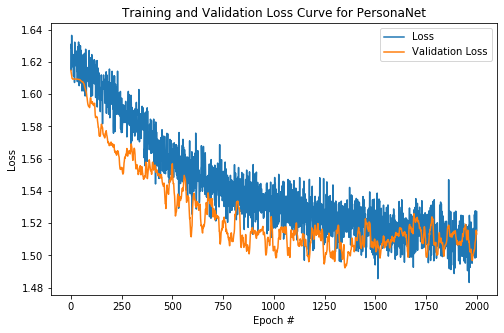

In [70]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.set_title('Training and Validation Loss Curve for PersonaNet')
ax.plot(hist.history['loss'], label = 'Loss')
ax.plot(hist.history['val_loss'], label = 'Validation Loss')
ax.set_xlabel('Epoch #')
ax.set_ylabel('Loss')
ax.legend()

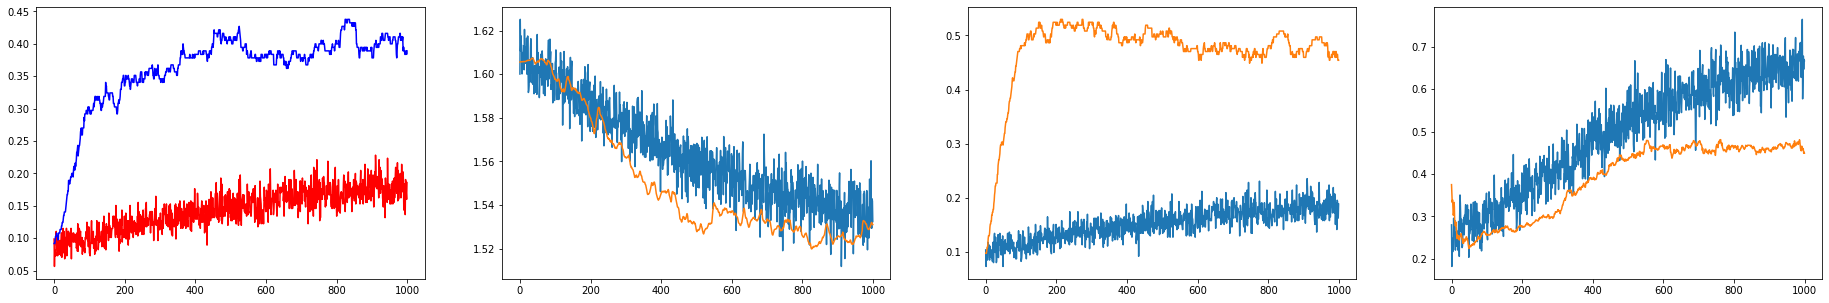

In [279]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 5))
ax1.plot(hist.history['acc'], 'r')
ax1.plot(hist.history['val_acc'], 'b')

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])

ax3.plot(hist.history['recall_4'])
ax3.plot(hist.history['val_recall_4'])

ax4.plot(hist.history['precision_4'])
ax4.plot(hist.history['val_precision_4'])

## Save Model

In [256]:
model.save('model_4k_strat.h5')

In [23]:
model = tf.keras.models.load_model('model_10k.h5')

## Perform Predictions

In [44]:
tt = tt.reshape((53, 24, 24, 1))
pt = pt.reshape((53, 24, 24, 1))

In [45]:
pred = model.predict([tt, pt])

In [46]:
feat_s = []
lab_s = []
for i in range(lab_e.shape[0]):
    if np.argmax(lab_e[i][0]) == 0 or np.argmax(lab_e[i][0]) == 1:
        feat_s.append(np.array(feat[i]))
        lab_s.append(lab[i])

In [47]:
feat_s = np.array(feat_s)
lab_s = np.array(lab_s)

In [48]:
lab_test.shape

(53, 5, 5)

In [49]:
from sklearn.preprocessing import OneHotEncoder
test = lab.copy()
ohe = OneHotEncoder(sparse = False)
ohe.fit(test.reshape(-1, 1))
op = ohe.transform(lab_s.reshape(-1, 1))
op = op.reshape((-1, 5, 5))
print(op.shape)

(4, 5, 5)


D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [50]:
lab_test = np.vstack((lab_test, op))

In [51]:
lab_s
from sklearn.preprocessing import OneHotEncoder
test = lab_s.copy()
ohe = OneHotEncoder(sparse = False)
ohe.fit(test.reshape(-1, 1))
op = ohe.transform(test.reshape(-1, 1))
op = op.reshape((-1, 5, 5))
print(op.shape)

(4, 5, 5)


D:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
tr = feat_s[:, 0, :, :]
pr = feat_s[:, 1, :, :]

In [53]:
tt = np.vstack((tt, tr))
pt = np.vstack((pt, pr))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 5 dimension(s)

In [54]:
print(np.shape(feat_s), np.shape(lab_s))

(4, 2, 24, 24, 1, 1) (4, 5)


In [55]:
ps = []
for i in range(pred.shape[0]):
    xs = []
    for j in range(pred.shape[1]):
        xs.append(np.argmax(pred[i][j]))
    ps.append(xs)

In [56]:
ls = []
for i in range(lab_test.shape[0]):
    qs = []
    for j in range(lab_test.shape[1]):
        qs.append(np.argmax(lab_test[i][j]))
    ls.append(qs)

In [57]:
ps = np.array(ps)
ls = np.array(ls)

In [58]:
ps = np.array(ps.flatten(), dtype = np.int64)
ls = np.array(ls.flatten(), dtype = np.int64)

In [59]:
print(len(ls))

285


In [60]:
ctr = 0
for i in range(len(ps)):
    if ps[i] == ls[i]:
        ctr += 1
print(ctr/float(len(ps)))

0.7584905660377359


In [61]:
from sklearn.metrics import accuracy_score as acc
print(acc(ps, ls))

ValueError: Found input variables with inconsistent numbers of samples: [265, 285]

## Separate Labels for Classification Report

In [62]:
n_lab = ls[:, 0]
e_lab = ls[:, 1]
o_lab = ls[:, 2]
a_lab = ls[:, 3]
c_lab = ls[:, 4]

IndexError: too many indices for array

In [63]:
n_pred = ps[:, 0]
e_pred = ps[:, 1]
o_pred = ps[:, 2]
a_pred = ps[:, 3]
c_pred = ps[:, 4]

IndexError: too many indices for array

## Performance for Class N

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sk_report_n = classification_report(
    digits=6,
    y_true = n_lab.flatten(), 
    y_pred = n_pred.flatten(), labels = [0, 1, 2, 3, 4])
print(sk_report_n)

print(f1_score(n_lab, n_pred, average = 'micro'))
print(precision_score(n_lab, n_pred, average = 'micro'))
print(recall_score(n_lab, n_pred, average = 'micro'))

NameError: name 'n_lab' is not defined

## Performance For Class E

In [390]:
sk_report_e = classification_report(
    digits=6,
    y_true = e_lab.flatten(), 
    y_pred = e_pred.flatten())
print(sk_report_e)

print(f1_score(e_lab, e_pred, average = 'micro'))
print(precision_score(e_lab, e_pred, average = 'micro'))
print(recall_score(e_lab, e_pred, average = 'micro'))

             precision    recall  f1-score   support

          0   0.000000  0.000000  0.000000         0
          1   1.000000  0.500000  0.666667         2
          2   1.000000  1.000000  1.000000         3
          3   0.750000  0.923077  0.827586        13
          4   0.933333  0.736842  0.823529        19

avg / total   0.877928  0.810811  0.830784        37

0.8108108108108109
0.8108108108108109
0.8108108108108109


D:\Anaconda\envs\dl\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Performance for Class O

In [391]:
sk_report_o = classification_report(
    digits=6,
    y_true = o_lab.flatten(), 
    y_pred = o_pred.flatten())
print(sk_report_o)

print(f1_score(o_lab, o_pred, average = 'micro'))
print(precision_score(o_lab, o_pred, average = 'micro'))
print(recall_score(o_lab, o_pred, average = 'micro'))

             precision    recall  f1-score   support

          1   0.000000  0.000000  0.000000         0
          2   0.000000  0.000000  0.000000         1
          3   0.875000  0.700000  0.777778        10
          4   0.884615  0.884615  0.884615        26

avg / total   0.858108  0.810811  0.831832        37

0.8108108108108109
0.8108108108108109
0.8108108108108109


## Performance for Class A

In [393]:
sk_report_a = classification_report(
    digits=6,
    y_true = a_lab.flatten(), 
    y_pred = a_pred.flatten())
print(sk_report_a)

print(f1_score(a_lab, a_pred, average = 'micro'))
print(precision_score(a_lab, a_pred, average = 'micro'))
print(recall_score(a_lab, a_pred, average = 'micro'))

             precision    recall  f1-score   support

          1   0.000000  0.000000  0.000000         0
          2   0.750000  0.750000  0.750000         4
          3   0.727273  0.571429  0.640000        14
          4   0.761905  0.842105  0.800000        19

avg / total   0.747514  0.729730  0.734054        37

0.7297297297297297
0.7297297297297297
0.7297297297297297


## Performance for Class C

In [394]:
sk_report_c = classification_report(
    digits=6,
    y_true = c_lab.flatten(), 
    y_pred = c_pred.flatten())
print(sk_report_c)

print(f1_score(c_lab, c_pred, average = 'micro'))
print(precision_score(c_lab, c_pred, average = 'micro'))
print(recall_score(c_lab, c_pred, average = 'micro'))

             precision    recall  f1-score   support

          0   0.000000  0.000000  0.000000         0
          1   1.000000  1.000000  1.000000         2
          2   1.000000  0.500000  0.666667         2
          3   1.000000  0.555556  0.714286         9
          4   0.851852  0.958333  0.901961        24

avg / total   0.903904  0.837838  0.848891        37

0.8378378378378378
0.8378378378378378
0.8378378378378378


In [343]:
print(len(ps), len(ls))

41 41


In [346]:
ps = np.array(ps)
ls = np.array(ls)

In [347]:
from sklearn.metrics import classification_report
sk_report = classification_report(
    digits=6,
    y_true = ls.flatten(), 
    y_pred = ps.flatten())
print(sk_report)

             precision    recall  f1-score   support

          0   0.000000  0.000000  0.000000         1
          1   0.250000  0.250000  0.250000         8
          2   0.692308  0.391304  0.500000        23
          3   0.557692  0.547170  0.552381        53
          4   0.770492  0.783333  0.776860       120

avg / total   0.682633  0.653659  0.663411       205



# END

In [193]:
############################################## 5 SAME CNNs ####################################################################

In [26]:
print(lab.shape)

(122, 5)


In [72]:
ohe.fit(lab.reshape(-1, 1))
def my_acc(pred, lab_test):
    ps = []
    for i in range(pred.shape[0]):
        ps.append(np.argmax(pred[i]))

    ls = []
    for i in range(lab_test.shape[0]):
        ls.append(ohe.inverse_transform(np.reshape(lab_test[i], (1, -1)))[0][0])
    
    ps = np.array(ps, dtype = np.int64)
    ls = np.array(ls, dtype = np.int64)

    ctr = 0
    for i in range(len(ps)):
        if ps[i] == ls[i]:
            ctr += 1
    return (ctr/float(len(ps)))

def p_acc(pred, lab_test):
    acc = tf.py_func(my_acc, [pred, lab_test], np.float64)
    return acc

In [187]:
labo = ohe.transform(lab_train.reshape(-1, 1))
print(labo.shape)

(2125, 5)


In [165]:
l0 = lab[:, 0]
l1 = lab[:, 1]
l2 = lab[:, 2]
l3 = lab[:, 3]
l4 = lab[:, 4]

ohe = OneHotEncoder()
ohe.fit(lab.reshape(-1, 1))

l0 = ohe.transform(l0.reshape(-1, 1))
l1 = ohe.transform(l1.reshape(-1, 1))
l2 = ohe.transform(l2.reshape(-1, 1))
l3 = ohe.transform(l3.reshape(-1, 1))
l4 = ohe.transform(l4.reshape(-1, 1))

In [166]:
from sklearn.model_selection import train_test_split
ftr0, ftt0, ltr0, ltt0 = train_test_split(feat, l0, test_size = 0.3, shuffle = True) 
ftr1, ftt1, ltr1, ltt1 = train_test_split(feat, l1, test_size = 0.3, shuffle = True) 
ftr2, ftt2, ltr2, ltt2 = train_test_split(feat, l2, test_size = 0.3, shuffle = True) 
ftr3, ftt3, ltr3, ltt3 = train_test_split(feat, l3, test_size = 0.3, shuffle = True) 
ftr4, ftt4, ltr4, ltt4 = train_test_split(feat, l4, test_size = 0.3, shuffle = True) 

In [167]:
ltt0.shape

(37, 5)

In [178]:
def create_model():
    inp_t = Input(shape = (24, 24, 1, ))
    x = Conv2D(4, (3, 3), strides = 2, activation = 'relu')(inp_t)
    x = BatchNormalization()(x)
    x = Dropout(rate = 0.1)(x)
    
    
    x = Conv2D(8, (3, 3), strides = 2, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate = 0.1)(x)

    inp_p = Input(shape = (24, 24, 1, ))
    y = Conv2D(4, (3, 3), strides = 2, activation = 'relu')(inp_p)
    y = BatchNormalization()(y)
    y = Dropout(rate = 0.1)(y)

    y = Conv2D(8, (3, 3), strides = 2, activation = 'relu')(y) 
    y = BatchNormalization()(y)
    y = Dropout(rate = 0.1)(y)



    flat_x = Flatten()(x)
    flat_y = Flatten()(y)

    concat = Concatenate()([flat_x, flat_y])
    
    concat = ReLU()(concat)
    concat = BatchNormalization()(concat)
    d5 = Dropout(rate = 0.5)(concat)
    
    z = Dense(6, activation = 'relu')(d5)
    z = BatchNormalization()(z)
    z = Dropout(0.5)(z)


    output = Dense(5)(z)    
    output = sigmoid(output)

    model = Model(inputs = [inp_t, inp_p], outputs = output)
    model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = [p_acc])
    return model

In [179]:
m0 = create_model()
m1 = create_model()
m2 = create_model()
m3 = create_model()
m4 = create_model()
m0.summary()

Model: "model_87"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_177 (InputLayer)          [(None, 24, 24, 1)]  0                                            
__________________________________________________________________________________________________
input_178 (InputLayer)          [(None, 24, 24, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_352 (Conv2D)             (None, 11, 11, 4)    40          input_177[0][0]                  
__________________________________________________________________________________________________
conv2d_354 (Conv2D)             (None, 11, 11, 4)    40          input_178[0][0]                  
___________________________________________________________________________________________

In [185]:
hist = m0.fit([t, p], lab_train, epochs = 10000, validation_data= [[tt, pt], lab_test], shuffle = True, batch_size = 32, verbose = True)

NameError: name 'tt' is not defined

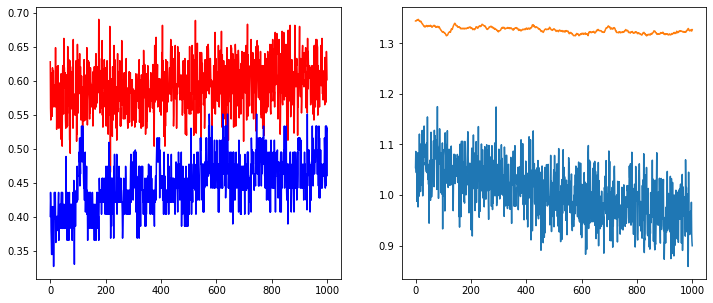

In [162]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
ax1.plot(hist_m0.history['p_acc'], 'r')
ax1.plot(hist_m0.history['val_p_acc'], 'b')


ax2.plot(hist_m0.history['loss'])
ax2.plot(hist_m0.history['val_loss'])

In [168]:
ltt1.shape

(37, 5)

In [170]:
hist_m1 = m1.fit([ftr1[:, 0, :, :], ftr1[:, 1, :, :]], ltr1 , validation_data= [[ftt1[:, 0, :, :], ftt1[:, 1, :, :]], ltt1], epochs = 5000, shuffle = True, batch_size = 24, verbose = True)

Train on 85 samples, validate on 37 samples
Epoch 1/5000
85/85 [==============================] - 0s 774us/sample - loss: 1.2573 - p_acc: 0.4399 - val_loss: 1.3436 - val_p_acc: 0.2821
Epoch 2/5000
85/85 [==============================] - 0s 669us/sample - loss: 1.2584 - p_acc: 0.3982 - val_loss: 1.3433 - val_p_acc: 0.3173
Epoch 3/5000
85/85 [==============================] - 0s 669us/sample - loss: 1.2561 - p_acc: 0.4119 - val_loss: 1.3436 - val_p_acc: 0.2676
Epoch 4/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.3520 - p_acc: 0.3462 - val_loss: 1.3447 - val_p_acc: 0.2997
Epoch 5/5000
85/85 [==============================] - 0s 727us/sample - loss: 1.2343 - p_acc: 0.5288 - val_loss: 1.3458 - val_p_acc: 0.3029
Epoch 6/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.3005 - p_acc: 0.3910 - val_loss: 1.3457 - val_p_acc: 0.3205
Epoch 7/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.3288 - p_acc: 0.3165 - val_loss: 1.3

Epoch 59/5000
85/85 [==============================] - 0s 669us/sample - loss: 1.2898 - p_acc: 0.5200 - val_loss: 1.3311 - val_p_acc: 0.3622
Epoch 60/5000
85/85 [==============================] - 0s 660us/sample - loss: 1.1629 - p_acc: 0.5393 - val_loss: 1.3301 - val_p_acc: 0.3974
Epoch 61/5000
85/85 [==============================] - 0s 669us/sample - loss: 1.2815 - p_acc: 0.4455 - val_loss: 1.3299 - val_p_acc: 0.3798
Epoch 62/5000
85/85 [==============================] - 0s 657us/sample - loss: 1.2319 - p_acc: 0.5112 - val_loss: 1.3299 - val_p_acc: 0.3974
Epoch 63/5000
85/85 [==============================] - 0s 666us/sample - loss: 1.2350 - p_acc: 0.4712 - val_loss: 1.3301 - val_p_acc: 0.3622
Epoch 64/5000
85/85 [==============================] - 0s 668us/sample - loss: 1.1936 - p_acc: 0.4712 - val_loss: 1.3312 - val_p_acc: 0.3798
Epoch 65/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.2749 - p_acc: 0.3357 - val_loss: 1.3304 - val_p_acc: 0.3622
Epoch 66/5000

Epoch 117/5000
85/85 [==============================] - 0s 668us/sample - loss: 1.2123 - p_acc: 0.4591 - val_loss: 1.3158 - val_p_acc: 0.3446
Epoch 118/5000
85/85 [==============================] - 0s 645us/sample - loss: 1.2266 - p_acc: 0.4054 - val_loss: 1.3149 - val_p_acc: 0.3974
Epoch 119/5000
85/85 [==============================] - 0s 657us/sample - loss: 1.2542 - p_acc: 0.4415 - val_loss: 1.3144 - val_p_acc: 0.4151
Epoch 120/5000
85/85 [==============================] - 0s 633us/sample - loss: 1.2344 - p_acc: 0.4992 - val_loss: 1.3128 - val_p_acc: 0.3622
Epoch 121/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.2367 - p_acc: 0.3774 - val_loss: 1.3122 - val_p_acc: 0.3622
Epoch 122/5000
85/85 [==============================] - 0s 727us/sample - loss: 1.2305 - p_acc: 0.5393 - val_loss: 1.3118 - val_p_acc: 0.4535
Epoch 123/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.2114 - p_acc: 0.4295 - val_loss: 1.3112 - val_p_acc: 0.4359
Epoch 

Epoch 175/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.2000 - p_acc: 0.4663 - val_loss: 1.2989 - val_p_acc: 0.4744
Epoch 176/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1919 - p_acc: 0.5617 - val_loss: 1.2981 - val_p_acc: 0.4567
Epoch 177/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.2052 - p_acc: 0.5112 - val_loss: 1.2962 - val_p_acc: 0.4038
Epoch 178/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1955 - p_acc: 0.5897 - val_loss: 1.2959 - val_p_acc: 0.4038
Epoch 179/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.2602 - p_acc: 0.4696 - val_loss: 1.2949 - val_p_acc: 0.3862
Epoch 180/5000
85/85 [==============================] - 0s 703us/sample - loss: 1.1429 - p_acc: 0.5144 - val_loss: 1.2964 - val_p_acc: 0.4006
Epoch 181/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1596 - p_acc: 0.5112 - val_loss: 1.2970 - val_p_acc: 0.4006
Epoch 

Epoch 233/5000
85/85 [==============================] - 0s 715us/sample - loss: 1.1302 - p_acc: 0.5409 - val_loss: 1.2860 - val_p_acc: 0.4391
Epoch 234/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.1858 - p_acc: 0.5024 - val_loss: 1.2865 - val_p_acc: 0.4744
Epoch 235/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1611 - p_acc: 0.4832 - val_loss: 1.2866 - val_p_acc: 0.4744
Epoch 236/5000
85/85 [==============================] - 0s 703us/sample - loss: 1.1016 - p_acc: 0.5601 - val_loss: 1.2861 - val_p_acc: 0.4423
Epoch 237/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1805 - p_acc: 0.6282 - val_loss: 1.2849 - val_p_acc: 0.4599
Epoch 238/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.1946 - p_acc: 0.5513 - val_loss: 1.2841 - val_p_acc: 0.4952
Epoch 239/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1618 - p_acc: 0.5112 - val_loss: 1.2838 - val_p_acc: 0.4599
Epoch 

Epoch 291/5000
85/85 [==============================] - 0s 705us/sample - loss: 1.1385 - p_acc: 0.4487 - val_loss: 1.2754 - val_p_acc: 0.4423
Epoch 292/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.1471 - p_acc: 0.6034 - val_loss: 1.2758 - val_p_acc: 0.4776
Epoch 293/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1953 - p_acc: 0.4784 - val_loss: 1.2750 - val_p_acc: 0.4776
Epoch 294/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1113 - p_acc: 0.4816 - val_loss: 1.2762 - val_p_acc: 0.4599
Epoch 295/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.2275 - p_acc: 0.5513 - val_loss: 1.2750 - val_p_acc: 0.5304
Epoch 296/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1563 - p_acc: 0.5377 - val_loss: 1.2736 - val_p_acc: 0.4071
Epoch 297/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1505 - p_acc: 0.5897 - val_loss: 1.2718 - val_p_acc: 0.4776
Epoch 

Epoch 349/5000
85/85 [==============================] - 0s 693us/sample - loss: 1.1066 - p_acc: 0.5705 - val_loss: 1.2528 - val_p_acc: 0.4776
Epoch 350/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1444 - p_acc: 0.5481 - val_loss: 1.2535 - val_p_acc: 0.4599
Epoch 351/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1429 - p_acc: 0.5128 - val_loss: 1.2534 - val_p_acc: 0.4423
Epoch 352/5000
85/85 [==============================] - 0s 682us/sample - loss: 1.1771 - p_acc: 0.4487 - val_loss: 1.2536 - val_p_acc: 0.4599
Epoch 353/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.1814 - p_acc: 0.4503 - val_loss: 1.2526 - val_p_acc: 0.4599
Epoch 354/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1965 - p_acc: 0.5529 - val_loss: 1.2525 - val_p_acc: 0.4952
Epoch 355/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.1590 - p_acc: 0.5216 - val_loss: 1.2531 - val_p_acc: 0.4776
Epoch 

Epoch 407/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.1218 - p_acc: 0.5200 - val_loss: 1.2381 - val_p_acc: 0.4599
Epoch 408/5000
85/85 [==============================] - 0s 685us/sample - loss: 1.1788 - p_acc: 0.4888 - val_loss: 1.2384 - val_p_acc: 0.4599
Epoch 409/5000
85/85 [==============================] - 0s 705us/sample - loss: 1.1508 - p_acc: 0.5304 - val_loss: 1.2373 - val_p_acc: 0.4599
Epoch 410/5000
85/85 [==============================] - 0s 703us/sample - loss: 1.1959 - p_acc: 0.5080 - val_loss: 1.2372 - val_p_acc: 0.3894
Epoch 411/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.0932 - p_acc: 0.5809 - val_loss: 1.2382 - val_p_acc: 0.4423
Epoch 412/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.0720 - p_acc: 0.5425 - val_loss: 1.2374 - val_p_acc: 0.4776
Epoch 413/5000
85/85 [==============================] - 0s 669us/sample - loss: 1.1599 - p_acc: 0.5248 - val_loss: 1.2365 - val_p_acc: 0.4776
Epoch 

Epoch 465/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.0609 - p_acc: 0.6194 - val_loss: 1.2338 - val_p_acc: 0.4423
Epoch 466/5000
85/85 [==============================] - 0s 715us/sample - loss: 1.0869 - p_acc: 0.5777 - val_loss: 1.2332 - val_p_acc: 0.4776
Epoch 467/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1525 - p_acc: 0.5256 - val_loss: 1.2331 - val_p_acc: 0.4071
Epoch 468/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.1429 - p_acc: 0.4591 - val_loss: 1.2328 - val_p_acc: 0.4423
Epoch 469/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.0882 - p_acc: 0.6106 - val_loss: 1.2335 - val_p_acc: 0.4599
Epoch 470/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1071 - p_acc: 0.6018 - val_loss: 1.2343 - val_p_acc: 0.4247
Epoch 471/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.1359 - p_acc: 0.5096 - val_loss: 1.2344 - val_p_acc: 0.4599
Epoch 

Epoch 523/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.0946 - p_acc: 0.5897 - val_loss: 1.2223 - val_p_acc: 0.4776
Epoch 524/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.1309 - p_acc: 0.4936 - val_loss: 1.2224 - val_p_acc: 0.4952
Epoch 525/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.1213 - p_acc: 0.5096 - val_loss: 1.2214 - val_p_acc: 0.4599
Epoch 526/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.1184 - p_acc: 0.5393 - val_loss: 1.2205 - val_p_acc: 0.5128
Epoch 527/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.0429 - p_acc: 0.6474 - val_loss: 1.2206 - val_p_acc: 0.4599
Epoch 528/5000
85/85 [==============================] - 0s 693us/sample - loss: 1.1600 - p_acc: 0.5200 - val_loss: 1.2191 - val_p_acc: 0.4599
Epoch 529/5000
85/85 [==============================] - 0s 680us/sample - loss: 1.0461 - p_acc: 0.6434 - val_loss: 1.2200 - val_p_acc: 0.4599
Epoch 

Epoch 581/5000
85/85 [==============================] - 0s 844us/sample - loss: 1.0770 - p_acc: 0.5633 - val_loss: 1.2097 - val_p_acc: 0.4776
Epoch 582/5000
85/85 [==============================] - 0s 845us/sample - loss: 1.0851 - p_acc: 0.4904 - val_loss: 1.2104 - val_p_acc: 0.4247
Epoch 583/5000
85/85 [==============================] - 0s 857us/sample - loss: 1.0479 - p_acc: 0.6538 - val_loss: 1.2098 - val_p_acc: 0.4599
Epoch 584/5000
85/85 [==============================] - 0s 868us/sample - loss: 1.0559 - p_acc: 0.5809 - val_loss: 1.2103 - val_p_acc: 0.4247
Epoch 585/5000
85/85 [==============================] - 0s 844us/sample - loss: 1.0339 - p_acc: 0.6018 - val_loss: 1.2112 - val_p_acc: 0.4247
Epoch 586/5000
85/85 [==============================] - 0s 845us/sample - loss: 1.0656 - p_acc: 0.5825 - val_loss: 1.2096 - val_p_acc: 0.4776
Epoch 587/5000
85/85 [==============================] - 0s 857us/sample - loss: 1.1454 - p_acc: 0.5096 - val_loss: 1.2077 - val_p_acc: 0.4599
Epoch 

Epoch 639/5000
85/85 [==============================] - 0s 774us/sample - loss: 1.0831 - p_acc: 0.5737 - val_loss: 1.1937 - val_p_acc: 0.4808
Epoch 640/5000
85/85 [==============================] - 0s 810us/sample - loss: 1.0763 - p_acc: 0.5601 - val_loss: 1.1929 - val_p_acc: 0.4631
Epoch 641/5000
85/85 [==============================] - 0s 857us/sample - loss: 1.0847 - p_acc: 0.5497 - val_loss: 1.1922 - val_p_acc: 0.4631
Epoch 642/5000
85/85 [==============================] - 0s 833us/sample - loss: 1.0779 - p_acc: 0.5337 - val_loss: 1.1917 - val_p_acc: 0.4984
Epoch 643/5000
85/85 [==============================] - 0s 845us/sample - loss: 1.1067 - p_acc: 0.5449 - val_loss: 1.1918 - val_p_acc: 0.4808
Epoch 644/5000
85/85 [==============================] - 0s 869us/sample - loss: 0.9954 - p_acc: 0.5929 - val_loss: 1.1917 - val_p_acc: 0.4984
Epoch 645/5000
85/85 [==============================] - 0s 869us/sample - loss: 1.0624 - p_acc: 0.5393 - val_loss: 1.1905 - val_p_acc: 0.4808
Epoch 

Epoch 697/5000
85/85 [==============================] - 0s 785us/sample - loss: 1.0906 - p_acc: 0.5793 - val_loss: 1.1846 - val_p_acc: 0.5160
Epoch 698/5000
85/85 [==============================] - 0s 775us/sample - loss: 1.0291 - p_acc: 0.6018 - val_loss: 1.1851 - val_p_acc: 0.5337
Epoch 699/5000
85/85 [==============================] - 0s 763us/sample - loss: 1.0628 - p_acc: 0.5321 - val_loss: 1.1831 - val_p_acc: 0.4808
Epoch 700/5000
85/85 [==============================] - 0s 751us/sample - loss: 1.0803 - p_acc: 0.6002 - val_loss: 1.1838 - val_p_acc: 0.5337
Epoch 701/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.0341 - p_acc: 0.5737 - val_loss: 1.1831 - val_p_acc: 0.4808
Epoch 702/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.0511 - p_acc: 0.5617 - val_loss: 1.1823 - val_p_acc: 0.5160
Epoch 703/5000
85/85 [==============================] - 0s 751us/sample - loss: 1.0344 - p_acc: 0.6450 - val_loss: 1.1832 - val_p_acc: 0.4808
Epoch 

Epoch 755/5000
85/85 [==============================] - 0s 763us/sample - loss: 1.0782 - p_acc: 0.5425 - val_loss: 1.1723 - val_p_acc: 0.4279
Epoch 756/5000
85/85 [==============================] - 0s 763us/sample - loss: 1.0756 - p_acc: 0.4904 - val_loss: 1.1714 - val_p_acc: 0.4808
Epoch 757/5000
85/85 [==============================] - 0s 738us/sample - loss: 1.0279 - p_acc: 0.5321 - val_loss: 1.1716 - val_p_acc: 0.4984
Epoch 758/5000
85/85 [==============================] - 0s 739us/sample - loss: 1.0590 - p_acc: 0.5929 - val_loss: 1.1713 - val_p_acc: 0.5160
Epoch 759/5000
85/85 [==============================] - 0s 727us/sample - loss: 1.0453 - p_acc: 0.5825 - val_loss: 1.1722 - val_p_acc: 0.4984
Epoch 760/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.0330 - p_acc: 0.5881 - val_loss: 1.1720 - val_p_acc: 0.4455
Epoch 761/5000
85/85 [==============================] - 0s 774us/sample - loss: 1.1047 - p_acc: 0.5617 - val_loss: 1.1712 - val_p_acc: 0.4808
Epoch 

Epoch 813/5000
85/85 [==============================] - 0s 763us/sample - loss: 1.0254 - p_acc: 0.5881 - val_loss: 1.1653 - val_p_acc: 0.4984
Epoch 814/5000
85/85 [==============================] - 0s 751us/sample - loss: 1.0440 - p_acc: 0.6194 - val_loss: 1.1653 - val_p_acc: 0.4631
Epoch 815/5000
85/85 [==============================] - 0s 751us/sample - loss: 1.0750 - p_acc: 0.5353 - val_loss: 1.1636 - val_p_acc: 0.4808
Epoch 816/5000
85/85 [==============================] - 0s 740us/sample - loss: 1.0432 - p_acc: 0.5633 - val_loss: 1.1636 - val_p_acc: 0.4631
Epoch 817/5000
85/85 [==============================] - 0s 739us/sample - loss: 1.0413 - p_acc: 0.5080 - val_loss: 1.1628 - val_p_acc: 0.5160
Epoch 818/5000
85/85 [==============================] - 0s 750us/sample - loss: 1.0949 - p_acc: 0.5425 - val_loss: 1.1619 - val_p_acc: 0.4631
Epoch 819/5000
85/85 [==============================] - 0s 727us/sample - loss: 0.9696 - p_acc: 0.6522 - val_loss: 1.1623 - val_p_acc: 0.4631
Epoch 

Epoch 871/5000
85/85 [==============================] - 0s 763us/sample - loss: 0.9824 - p_acc: 0.6018 - val_loss: 1.1632 - val_p_acc: 0.4455
Epoch 872/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.9865 - p_acc: 0.5929 - val_loss: 1.1625 - val_p_acc: 0.4631
Epoch 873/5000
85/85 [==============================] - 0s 727us/sample - loss: 1.0407 - p_acc: 0.5304 - val_loss: 1.1623 - val_p_acc: 0.5160
Epoch 874/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.9935 - p_acc: 0.5841 - val_loss: 1.1624 - val_p_acc: 0.4631
Epoch 875/5000
85/85 [==============================] - 0s 739us/sample - loss: 1.0051 - p_acc: 0.4696 - val_loss: 1.1624 - val_p_acc: 0.5160
Epoch 876/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.9874 - p_acc: 0.6659 - val_loss: 1.1614 - val_p_acc: 0.4631
Epoch 877/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.0722 - p_acc: 0.5272 - val_loss: 1.1614 - val_p_acc: 0.4984
Epoch 

Epoch 929/5000
85/85 [==============================] - 0s 739us/sample - loss: 1.0498 - p_acc: 0.5913 - val_loss: 1.1556 - val_p_acc: 0.4631
Epoch 930/5000
85/85 [==============================] - 0s 762us/sample - loss: 1.0396 - p_acc: 0.5569 - val_loss: 1.1552 - val_p_acc: 0.4808
Epoch 931/5000
85/85 [==============================] - 0s 763us/sample - loss: 0.9746 - p_acc: 0.6274 - val_loss: 1.1546 - val_p_acc: 0.4631
Epoch 932/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.9993 - p_acc: 0.5529 - val_loss: 1.1531 - val_p_acc: 0.4808
Epoch 933/5000
85/85 [==============================] - 0s 727us/sample - loss: 1.0403 - p_acc: 0.6002 - val_loss: 1.1527 - val_p_acc: 0.4984
Epoch 934/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9787 - p_acc: 0.5753 - val_loss: 1.1527 - val_p_acc: 0.4631
Epoch 935/5000
85/85 [==============================] - 0s 740us/sample - loss: 1.0014 - p_acc: 0.5649 - val_loss: 1.1520 - val_p_acc: 0.4984
Epoch 

Epoch 987/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9916 - p_acc: 0.5601 - val_loss: 1.1484 - val_p_acc: 0.5160
Epoch 988/5000
85/85 [==============================] - 0s 703us/sample - loss: 1.0280 - p_acc: 0.5096 - val_loss: 1.1483 - val_p_acc: 0.4808
Epoch 989/5000
85/85 [==============================] - 0s 693us/sample - loss: 1.0133 - p_acc: 0.6018 - val_loss: 1.1482 - val_p_acc: 0.4631
Epoch 990/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9248 - p_acc: 0.6090 - val_loss: 1.1480 - val_p_acc: 0.5160
Epoch 991/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9898 - p_acc: 0.5617 - val_loss: 1.1480 - val_p_acc: 0.5160
Epoch 992/5000
85/85 [==============================] - 0s 716us/sample - loss: 1.0364 - p_acc: 0.5649 - val_loss: 1.1478 - val_p_acc: 0.5337
Epoch 993/5000
85/85 [==============================] - 0s 704us/sample - loss: 1.0316 - p_acc: 0.4904 - val_loss: 1.1462 - val_p_acc: 0.4984
Epoch 

85/85 [==============================] - 0s 705us/sample - loss: 0.9893 - p_acc: 0.6506 - val_loss: 1.1371 - val_p_acc: 0.4631
Epoch 1102/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.0353 - p_acc: 0.5409 - val_loss: 1.1372 - val_p_acc: 0.4631
Epoch 1103/5000
85/85 [==============================] - 0s 691us/sample - loss: 0.9934 - p_acc: 0.5601 - val_loss: 1.1381 - val_p_acc: 0.4984
Epoch 1104/5000
85/85 [==============================] - 0s 798us/sample - loss: 1.0693 - p_acc: 0.6538 - val_loss: 1.1383 - val_p_acc: 0.4631
Epoch 1105/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.9624 - p_acc: 0.5497 - val_loss: 1.1374 - val_p_acc: 0.4631
Epoch 1106/5000
85/85 [==============================] - 0s 693us/sample - loss: 1.0466 - p_acc: 0.5232 - val_loss: 1.1380 - val_p_acc: 0.5337
Epoch 1107/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.9975 - p_acc: 0.5232 - val_loss: 1.1377 - val_p_acc: 0.4984
Epoch 1108/5000

85/85 [==============================] - 0s 693us/sample - loss: 0.9147 - p_acc: 0.6522 - val_loss: 1.1313 - val_p_acc: 0.5160
Epoch 1216/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.9828 - p_acc: 0.5633 - val_loss: 1.1315 - val_p_acc: 0.4984
Epoch 1217/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9707 - p_acc: 0.6226 - val_loss: 1.1309 - val_p_acc: 0.4808
Epoch 1218/5000
85/85 [==============================] - 0s 692us/sample - loss: 1.0647 - p_acc: 0.4728 - val_loss: 1.1304 - val_p_acc: 0.4984
Epoch 1219/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.9553 - p_acc: 0.5929 - val_loss: 1.1299 - val_p_acc: 0.4808
Epoch 1220/5000
85/85 [==============================] - 0s 701us/sample - loss: 1.0048 - p_acc: 0.5737 - val_loss: 1.1294 - val_p_acc: 0.4631
Epoch 1221/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.9462 - p_acc: 0.6018 - val_loss: 1.1296 - val_p_acc: 0.4455
Epoch 1222/5000

85/85 [==============================] - 0s 735us/sample - loss: 0.9619 - p_acc: 0.5962 - val_loss: 1.1134 - val_p_acc: 0.4984
Epoch 1330/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9524 - p_acc: 0.6490 - val_loss: 1.1130 - val_p_acc: 0.4631
Epoch 1331/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8647 - p_acc: 0.6314 - val_loss: 1.1131 - val_p_acc: 0.4631
Epoch 1332/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9623 - p_acc: 0.5441 - val_loss: 1.1130 - val_p_acc: 0.4455
Epoch 1333/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9168 - p_acc: 0.6106 - val_loss: 1.1125 - val_p_acc: 0.4984
Epoch 1334/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9577 - p_acc: 0.5513 - val_loss: 1.1118 - val_p_acc: 0.4631
Epoch 1335/5000
85/85 [==============================] - 0s 681us/sample - loss: 1.0646 - p_acc: 0.5513 - val_loss: 1.1125 - val_p_acc: 0.4984
Epoch 1336/5000

85/85 [==============================] - 0s 716us/sample - loss: 0.9317 - p_acc: 0.6002 - val_loss: 1.1143 - val_p_acc: 0.5016
Epoch 1444/5000
85/85 [==============================] - 0s 689us/sample - loss: 0.9698 - p_acc: 0.5337 - val_loss: 1.1155 - val_p_acc: 0.4840
Epoch 1445/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9098 - p_acc: 0.5809 - val_loss: 1.1153 - val_p_acc: 0.4840
Epoch 1446/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9224 - p_acc: 0.6699 - val_loss: 1.1146 - val_p_acc: 0.5192
Epoch 1447/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9747 - p_acc: 0.6923 - val_loss: 1.1143 - val_p_acc: 0.4487
Epoch 1448/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8868 - p_acc: 0.6258 - val_loss: 1.1144 - val_p_acc: 0.5192
Epoch 1449/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9532 - p_acc: 0.5617 - val_loss: 1.1146 - val_p_acc: 0.5192
Epoch 1450/5000

85/85 [==============================] - 0s 704us/sample - loss: 0.8589 - p_acc: 0.6907 - val_loss: 1.1153 - val_p_acc: 0.5016
Epoch 1558/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.9192 - p_acc: 0.5809 - val_loss: 1.1154 - val_p_acc: 0.4840
Epoch 1559/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.9614 - p_acc: 0.6298 - val_loss: 1.1157 - val_p_acc: 0.5192
Epoch 1560/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9535 - p_acc: 0.5200 - val_loss: 1.1150 - val_p_acc: 0.5369
Epoch 1561/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8983 - p_acc: 0.6418 - val_loss: 1.1148 - val_p_acc: 0.5192
Epoch 1562/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8650 - p_acc: 0.7043 - val_loss: 1.1155 - val_p_acc: 0.4840
Epoch 1563/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.9020 - p_acc: 0.5929 - val_loss: 1.1142 - val_p_acc: 0.5016
Epoch 1564/5000

85/85 [==============================] - 0s 716us/sample - loss: 1.0465 - p_acc: 0.5721 - val_loss: 1.1048 - val_p_acc: 0.4663
Epoch 1672/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.9666 - p_acc: 0.5633 - val_loss: 1.1038 - val_p_acc: 0.5369
Epoch 1673/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9327 - p_acc: 0.6282 - val_loss: 1.1020 - val_p_acc: 0.5192
Epoch 1674/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9234 - p_acc: 0.5913 - val_loss: 1.1008 - val_p_acc: 0.4487
Epoch 1675/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9205 - p_acc: 0.6018 - val_loss: 1.1009 - val_p_acc: 0.5016
Epoch 1676/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.8845 - p_acc: 0.6522 - val_loss: 1.1003 - val_p_acc: 0.5192
Epoch 1677/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9244 - p_acc: 0.5841 - val_loss: 1.1005 - val_p_acc: 0.5721
Epoch 1678/5000

85/85 [==============================] - 0s 715us/sample - loss: 0.9322 - p_acc: 0.5913 - val_loss: 1.1078 - val_p_acc: 0.5192
Epoch 1786/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.9609 - p_acc: 0.5929 - val_loss: 1.1083 - val_p_acc: 0.5369
Epoch 1787/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8543 - p_acc: 0.5649 - val_loss: 1.1101 - val_p_acc: 0.5016
Epoch 1788/5000
85/85 [==============================] - 0s 669us/sample - loss: 0.8790 - p_acc: 0.6538 - val_loss: 1.1107 - val_p_acc: 0.5016
Epoch 1789/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9191 - p_acc: 0.5793 - val_loss: 1.1092 - val_p_acc: 0.5192
Epoch 1790/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8737 - p_acc: 0.6330 - val_loss: 1.1089 - val_p_acc: 0.4840
Epoch 1791/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8904 - p_acc: 0.6194 - val_loss: 1.1099 - val_p_acc: 0.4840
Epoch 1792/5000

85/85 [==============================] - 0s 705us/sample - loss: 0.8184 - p_acc: 0.6939 - val_loss: 1.1179 - val_p_acc: 0.5369
Epoch 1900/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.9358 - p_acc: 0.5529 - val_loss: 1.1177 - val_p_acc: 0.4840
Epoch 1901/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.9955 - p_acc: 0.5986 - val_loss: 1.1152 - val_p_acc: 0.5016
Epoch 1902/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8337 - p_acc: 0.6450 - val_loss: 1.1147 - val_p_acc: 0.4840
Epoch 1903/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.9448 - p_acc: 0.5825 - val_loss: 1.1147 - val_p_acc: 0.5545
Epoch 1904/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8963 - p_acc: 0.6715 - val_loss: 1.1147 - val_p_acc: 0.5192
Epoch 1905/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9750 - p_acc: 0.5841 - val_loss: 1.1136 - val_p_acc: 0.4663
Epoch 1906/5000

85/85 [==============================] - 0s 705us/sample - loss: 0.9157 - p_acc: 0.7011 - val_loss: 1.1115 - val_p_acc: 0.5192
Epoch 2014/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8939 - p_acc: 0.6611 - val_loss: 1.1117 - val_p_acc: 0.4840
Epoch 2015/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8924 - p_acc: 0.6018 - val_loss: 1.1124 - val_p_acc: 0.5192
Epoch 2016/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8547 - p_acc: 0.6330 - val_loss: 1.1118 - val_p_acc: 0.5016
Epoch 2017/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8586 - p_acc: 0.6643 - val_loss: 1.1118 - val_p_acc: 0.5369
Epoch 2018/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8688 - p_acc: 0.6242 - val_loss: 1.1124 - val_p_acc: 0.5192
Epoch 2019/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9425 - p_acc: 0.6122 - val_loss: 1.1130 - val_p_acc: 0.5016
Epoch 2020/5000

85/85 [==============================] - 0s 693us/sample - loss: 0.9003 - p_acc: 0.5825 - val_loss: 1.1044 - val_p_acc: 0.5369
Epoch 2128/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8660 - p_acc: 0.5425 - val_loss: 1.1038 - val_p_acc: 0.5369
Epoch 2129/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.9006 - p_acc: 0.5946 - val_loss: 1.1033 - val_p_acc: 0.5721
Epoch 2130/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8190 - p_acc: 0.6226 - val_loss: 1.1007 - val_p_acc: 0.5545
Epoch 2131/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.9632 - p_acc: 0.5272 - val_loss: 1.1012 - val_p_acc: 0.5369
Epoch 2132/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8936 - p_acc: 0.6002 - val_loss: 1.1027 - val_p_acc: 0.5192
Epoch 2133/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8918 - p_acc: 0.5513 - val_loss: 1.1033 - val_p_acc: 0.5545
Epoch 2134/5000

85/85 [==============================] - 0s 692us/sample - loss: 0.8701 - p_acc: 0.6002 - val_loss: 1.1211 - val_p_acc: 0.5016
Epoch 2242/5000
85/85 [==============================] - 0s 703us/sample - loss: 0.8823 - p_acc: 0.6154 - val_loss: 1.1198 - val_p_acc: 0.4840
Epoch 2243/5000
85/85 [==============================] - 0s 707us/sample - loss: 0.9427 - p_acc: 0.5721 - val_loss: 1.1195 - val_p_acc: 0.5369
Epoch 2244/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8337 - p_acc: 0.6242 - val_loss: 1.1203 - val_p_acc: 0.5016
Epoch 2245/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.8201 - p_acc: 0.6210 - val_loss: 1.1210 - val_p_acc: 0.5545
Epoch 2246/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.9367 - p_acc: 0.5825 - val_loss: 1.1222 - val_p_acc: 0.5016
Epoch 2247/5000
85/85 [==============================] - 0s 703us/sample - loss: 0.8749 - p_acc: 0.6138 - val_loss: 1.1230 - val_p_acc: 0.4840
Epoch 2248/5000

85/85 [==============================] - 0s 716us/sample - loss: 0.7869 - p_acc: 0.7236 - val_loss: 1.1160 - val_p_acc: 0.5369
Epoch 2356/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8689 - p_acc: 0.5946 - val_loss: 1.1164 - val_p_acc: 0.5016
Epoch 2357/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8452 - p_acc: 0.6242 - val_loss: 1.1154 - val_p_acc: 0.5016
Epoch 2358/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8285 - p_acc: 0.6346 - val_loss: 1.1160 - val_p_acc: 0.4840
Epoch 2359/5000
85/85 [==============================] - 0s 727us/sample - loss: 0.9008 - p_acc: 0.5144 - val_loss: 1.1161 - val_p_acc: 0.4840
Epoch 2360/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8375 - p_acc: 0.7099 - val_loss: 1.1152 - val_p_acc: 0.5192
Epoch 2361/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8019 - p_acc: 0.7043 - val_loss: 1.1151 - val_p_acc: 0.5016
Epoch 2362/5000

85/85 [==============================] - 0s 740us/sample - loss: 0.7116 - p_acc: 0.6747 - val_loss: 1.1081 - val_p_acc: 0.5016
Epoch 2470/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8819 - p_acc: 0.6522 - val_loss: 1.1076 - val_p_acc: 0.5369
Epoch 2471/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8143 - p_acc: 0.6106 - val_loss: 1.1073 - val_p_acc: 0.5192
Epoch 2472/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9144 - p_acc: 0.5529 - val_loss: 1.1070 - val_p_acc: 0.4840
Epoch 2473/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8918 - p_acc: 0.5529 - val_loss: 1.1084 - val_p_acc: 0.5192
Epoch 2474/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.9038 - p_acc: 0.5633 - val_loss: 1.1087 - val_p_acc: 0.5016
Epoch 2475/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.7742 - p_acc: 0.6851 - val_loss: 1.1085 - val_p_acc: 0.4840
Epoch 2476/5000

85/85 [==============================] - 0s 716us/sample - loss: 0.8994 - p_acc: 0.6210 - val_loss: 1.1341 - val_p_acc: 0.5369
Epoch 2584/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8658 - p_acc: 0.6018 - val_loss: 1.1302 - val_p_acc: 0.5545
Epoch 2585/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.7776 - p_acc: 0.6939 - val_loss: 1.1294 - val_p_acc: 0.5369
Epoch 2586/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.8485 - p_acc: 0.6034 - val_loss: 1.1283 - val_p_acc: 0.4840
Epoch 2587/5000
85/85 [==============================] - 0s 680us/sample - loss: 0.8977 - p_acc: 0.6490 - val_loss: 1.1289 - val_p_acc: 0.5369
Epoch 2588/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7795 - p_acc: 0.6747 - val_loss: 1.1287 - val_p_acc: 0.4487
Epoch 2589/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.8984 - p_acc: 0.6386 - val_loss: 1.1290 - val_p_acc: 0.5016
Epoch 2590/5000

85/85 [==============================] - 0s 681us/sample - loss: 0.9420 - p_acc: 0.5393 - val_loss: 1.1188 - val_p_acc: 0.5048
Epoch 2698/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.8433 - p_acc: 0.6715 - val_loss: 1.1199 - val_p_acc: 0.5192
Epoch 2699/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8544 - p_acc: 0.6554 - val_loss: 1.1202 - val_p_acc: 0.5401
Epoch 2700/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9009 - p_acc: 0.5529 - val_loss: 1.1196 - val_p_acc: 0.5401
Epoch 2701/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.7978 - p_acc: 0.6258 - val_loss: 1.1192 - val_p_acc: 0.5224
Epoch 2702/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8645 - p_acc: 0.6242 - val_loss: 1.1191 - val_p_acc: 0.5753
Epoch 2703/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8669 - p_acc: 0.6522 - val_loss: 1.1189 - val_p_acc: 0.5577
Epoch 2704/5000

85/85 [==============================] - 0s 728us/sample - loss: 0.8390 - p_acc: 0.6627 - val_loss: 1.1243 - val_p_acc: 0.5224
Epoch 2812/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8740 - p_acc: 0.6138 - val_loss: 1.1233 - val_p_acc: 0.5753
Epoch 2813/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7483 - p_acc: 0.7115 - val_loss: 1.1230 - val_p_acc: 0.5401
Epoch 2814/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.7811 - p_acc: 0.6675 - val_loss: 1.1227 - val_p_acc: 0.5753
Epoch 2815/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.8081 - p_acc: 0.6522 - val_loss: 1.1224 - val_p_acc: 0.5401
Epoch 2816/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8774 - p_acc: 0.6050 - val_loss: 1.1256 - val_p_acc: 0.5224
Epoch 2817/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.8237 - p_acc: 0.6226 - val_loss: 1.1298 - val_p_acc: 0.5224
Epoch 2818/5000

85/85 [==============================] - 0s 762us/sample - loss: 0.8049 - p_acc: 0.6522 - val_loss: 1.1352 - val_p_acc: 0.5577
Epoch 2926/5000
85/85 [==============================] - 0s 763us/sample - loss: 0.7482 - p_acc: 0.6851 - val_loss: 1.1347 - val_p_acc: 0.5048
Epoch 2927/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.8144 - p_acc: 0.6643 - val_loss: 1.1336 - val_p_acc: 0.5577
Epoch 2928/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.8072 - p_acc: 0.6378 - val_loss: 1.1328 - val_p_acc: 0.5401
Epoch 2929/5000
85/85 [==============================] - 0s 727us/sample - loss: 0.7688 - p_acc: 0.6955 - val_loss: 1.1315 - val_p_acc: 0.5577
Epoch 2930/5000
85/85 [==============================] - 0s 740us/sample - loss: 0.8142 - p_acc: 0.6210 - val_loss: 1.1312 - val_p_acc: 0.5048
Epoch 2931/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.8408 - p_acc: 0.6314 - val_loss: 1.1291 - val_p_acc: 0.5224
Epoch 2932/5000

85/85 [==============================] - 0s 751us/sample - loss: 0.8541 - p_acc: 0.6154 - val_loss: 1.1214 - val_p_acc: 0.5577
Epoch 3040/5000
85/85 [==============================] - 0s 798us/sample - loss: 0.8582 - p_acc: 0.6034 - val_loss: 1.1222 - val_p_acc: 0.5753
Epoch 3041/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.8889 - p_acc: 0.5705 - val_loss: 1.1233 - val_p_acc: 0.5224
Epoch 3042/5000
85/85 [==============================] - 0s 740us/sample - loss: 0.7793 - p_acc: 0.7059 - val_loss: 1.1221 - val_p_acc: 0.5401
Epoch 3043/5000
85/85 [==============================] - 0s 763us/sample - loss: 0.7686 - p_acc: 0.6923 - val_loss: 1.1230 - val_p_acc: 0.5224
Epoch 3044/5000
85/85 [==============================] - 0s 916us/sample - loss: 0.8730 - p_acc: 0.5441 - val_loss: 1.1231 - val_p_acc: 0.5577
Epoch 3045/5000
85/85 [==============================] - 0s 868us/sample - loss: 0.7637 - p_acc: 0.7356 - val_loss: 1.1218 - val_p_acc: 0.4455
Epoch 3046/5000

85/85 [==============================] - 0s 751us/sample - loss: 0.8004 - p_acc: 0.6522 - val_loss: 1.1238 - val_p_acc: 0.4455
Epoch 3154/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.9465 - p_acc: 0.5425 - val_loss: 1.1239 - val_p_acc: 0.4631
Epoch 3155/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8874 - p_acc: 0.5737 - val_loss: 1.1259 - val_p_acc: 0.4984
Epoch 3156/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8413 - p_acc: 0.5857 - val_loss: 1.1257 - val_p_acc: 0.4631
Epoch 3157/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.7430 - p_acc: 0.7027 - val_loss: 1.1267 - val_p_acc: 0.4455
Epoch 3158/5000
85/85 [==============================] - 0s 727us/sample - loss: 0.7500 - p_acc: 0.6362 - val_loss: 1.1269 - val_p_acc: 0.4808
Epoch 3159/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.7312 - p_acc: 0.6851 - val_loss: 1.1265 - val_p_acc: 0.4984
Epoch 3160/5000

85/85 [==============================] - 0s 751us/sample - loss: 0.8520 - p_acc: 0.6018 - val_loss: 1.1320 - val_p_acc: 0.5401
Epoch 3268/5000
85/85 [==============================] - 0s 774us/sample - loss: 0.8009 - p_acc: 0.6819 - val_loss: 1.1340 - val_p_acc: 0.5753
Epoch 3269/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7847 - p_acc: 0.6538 - val_loss: 1.1345 - val_p_acc: 0.5753
Epoch 3270/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.8814 - p_acc: 0.6018 - val_loss: 1.1360 - val_p_acc: 0.5401
Epoch 3271/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.8038 - p_acc: 0.6715 - val_loss: 1.1361 - val_p_acc: 0.5224
Epoch 3272/5000
85/85 [==============================] - 0s 727us/sample - loss: 0.8106 - p_acc: 0.6138 - val_loss: 1.1368 - val_p_acc: 0.5753
Epoch 3273/5000
85/85 [==============================] - 0s 703us/sample - loss: 0.7537 - p_acc: 0.6554 - val_loss: 1.1367 - val_p_acc: 0.5048
Epoch 3274/5000

85/85 [==============================] - 0s 704us/sample - loss: 0.8018 - p_acc: 0.6242 - val_loss: 1.1383 - val_p_acc: 0.5577
Epoch 3382/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8254 - p_acc: 0.6226 - val_loss: 1.1373 - val_p_acc: 0.5401
Epoch 3383/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7636 - p_acc: 0.6450 - val_loss: 1.1361 - val_p_acc: 0.5577
Epoch 3384/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8172 - p_acc: 0.6210 - val_loss: 1.1365 - val_p_acc: 0.5401
Epoch 3385/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7806 - p_acc: 0.6330 - val_loss: 1.1361 - val_p_acc: 0.5577
Epoch 3386/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8422 - p_acc: 0.6346 - val_loss: 1.1359 - val_p_acc: 0.5401
Epoch 3387/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.7077 - p_acc: 0.7043 - val_loss: 1.1361 - val_p_acc: 0.5753
Epoch 3388/5000

85/85 [==============================] - 0s 740us/sample - loss: 0.7540 - p_acc: 0.7220 - val_loss: 1.1414 - val_p_acc: 0.4696
Epoch 3496/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8901 - p_acc: 0.6138 - val_loss: 1.1424 - val_p_acc: 0.5224
Epoch 3497/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.7216 - p_acc: 0.6835 - val_loss: 1.1426 - val_p_acc: 0.5753
Epoch 3498/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.8417 - p_acc: 0.6450 - val_loss: 1.1437 - val_p_acc: 0.5401
Epoch 3499/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7893 - p_acc: 0.6506 - val_loss: 1.1436 - val_p_acc: 0.5048
Epoch 3500/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.8932 - p_acc: 0.6715 - val_loss: 1.1451 - val_p_acc: 0.5577
Epoch 3501/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8469 - p_acc: 0.6627 - val_loss: 1.1467 - val_p_acc: 0.5753
Epoch 3502/5000

85/85 [==============================] - 0s 750us/sample - loss: 0.8138 - p_acc: 0.6394 - val_loss: 1.1313 - val_p_acc: 0.5545
Epoch 3610/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9325 - p_acc: 0.5529 - val_loss: 1.1305 - val_p_acc: 0.5545
Epoch 3611/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8217 - p_acc: 0.5721 - val_loss: 1.1282 - val_p_acc: 0.5160
Epoch 3612/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.9078 - p_acc: 0.5897 - val_loss: 1.1276 - val_p_acc: 0.4808
Epoch 3613/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7918 - p_acc: 0.7027 - val_loss: 1.1286 - val_p_acc: 0.4984
Epoch 3614/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8383 - p_acc: 0.6314 - val_loss: 1.1283 - val_p_acc: 0.4984
Epoch 3615/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.6720 - p_acc: 0.7428 - val_loss: 1.1291 - val_p_acc: 0.4631
Epoch 3616/5000

85/85 [==============================] - 0s 703us/sample - loss: 0.7261 - p_acc: 0.6907 - val_loss: 1.1634 - val_p_acc: 0.4840
Epoch 3724/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8616 - p_acc: 0.5601 - val_loss: 1.1643 - val_p_acc: 0.5192
Epoch 3725/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7139 - p_acc: 0.7444 - val_loss: 1.1626 - val_p_acc: 0.5016
Epoch 3726/5000
85/85 [==============================] - 0s 711us/sample - loss: 0.7633 - p_acc: 0.6747 - val_loss: 1.1612 - val_p_acc: 0.4663
Epoch 3727/5000
85/85 [==============================] - 0s 710us/sample - loss: 0.7568 - p_acc: 0.7131 - val_loss: 1.1590 - val_p_acc: 0.5016
Epoch 3728/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.6813 - p_acc: 0.7772 - val_loss: 1.1605 - val_p_acc: 0.5369
Epoch 3729/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7960 - p_acc: 0.6242 - val_loss: 1.1606 - val_p_acc: 0.5369
Epoch 3730/5000

85/85 [==============================] - 0s 692us/sample - loss: 0.8251 - p_acc: 0.6314 - val_loss: 1.1339 - val_p_acc: 0.5016
Epoch 3838/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7176 - p_acc: 0.6819 - val_loss: 1.1326 - val_p_acc: 0.5016
Epoch 3839/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7723 - p_acc: 0.5513 - val_loss: 1.1343 - val_p_acc: 0.5192
Epoch 3840/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8214 - p_acc: 0.6242 - val_loss: 1.1359 - val_p_acc: 0.4840
Epoch 3841/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8269 - p_acc: 0.7099 - val_loss: 1.1389 - val_p_acc: 0.5016
Epoch 3842/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.7874 - p_acc: 0.6659 - val_loss: 1.1418 - val_p_acc: 0.4984
Epoch 3843/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8491 - p_acc: 0.6595 - val_loss: 1.1420 - val_p_acc: 0.4631
Epoch 3844/5000

85/85 [==============================] - 0s 716us/sample - loss: 0.8293 - p_acc: 0.6186 - val_loss: 1.1469 - val_p_acc: 0.5192
Epoch 3952/5000
85/85 [==============================] - 0s 740us/sample - loss: 0.7843 - p_acc: 0.6923 - val_loss: 1.1479 - val_p_acc: 0.5016
Epoch 3953/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7262 - p_acc: 0.6170 - val_loss: 1.1463 - val_p_acc: 0.5369
Epoch 3954/5000
85/85 [==============================] - 0s 727us/sample - loss: 0.8077 - p_acc: 0.6434 - val_loss: 1.1467 - val_p_acc: 0.5192
Epoch 3955/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7676 - p_acc: 0.7147 - val_loss: 1.1497 - val_p_acc: 0.4840
Epoch 3956/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.7292 - p_acc: 0.7340 - val_loss: 1.1519 - val_p_acc: 0.5016
Epoch 3957/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.8588 - p_acc: 0.6595 - val_loss: 1.1484 - val_p_acc: 0.5369
Epoch 3958/5000

85/85 [==============================] - 0s 763us/sample - loss: 0.7336 - p_acc: 0.6418 - val_loss: 1.1669 - val_p_acc: 0.5192
Epoch 4066/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7318 - p_acc: 0.7059 - val_loss: 1.1656 - val_p_acc: 0.5016
Epoch 4067/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.9058 - p_acc: 0.6106 - val_loss: 1.1631 - val_p_acc: 0.4840
Epoch 4068/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7556 - p_acc: 0.6402 - val_loss: 1.1599 - val_p_acc: 0.4840
Epoch 4069/5000
85/85 [==============================] - 0s 740us/sample - loss: 0.7147 - p_acc: 0.7740 - val_loss: 1.1586 - val_p_acc: 0.5016
Epoch 4070/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7208 - p_acc: 0.7356 - val_loss: 1.1593 - val_p_acc: 0.5369
Epoch 4071/5000
85/85 [==============================] - 0s 715us/sample - loss: 0.7555 - p_acc: 0.6034 - val_loss: 1.1581 - val_p_acc: 0.5545
Epoch 4072/5000

85/85 [==============================] - 0s 763us/sample - loss: 0.7422 - p_acc: 0.7027 - val_loss: 1.1554 - val_p_acc: 0.5016
Epoch 4180/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.7173 - p_acc: 0.7636 - val_loss: 1.1553 - val_p_acc: 0.5369
Epoch 4181/5000
85/85 [==============================] - 0s 774us/sample - loss: 0.7574 - p_acc: 0.6627 - val_loss: 1.1582 - val_p_acc: 0.5369
Epoch 4182/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.7213 - p_acc: 0.6867 - val_loss: 1.1602 - val_p_acc: 0.5192
Epoch 4183/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.6810 - p_acc: 0.7324 - val_loss: 1.1612 - val_p_acc: 0.4663
Epoch 4184/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.8088 - p_acc: 0.6378 - val_loss: 1.1625 - val_p_acc: 0.5192
Epoch 4185/5000
85/85 [==============================] - 0s 762us/sample - loss: 0.8311 - p_acc: 0.6154 - val_loss: 1.1641 - val_p_acc: 0.5192
Epoch 4186/5000

85/85 [==============================] - 0s 739us/sample - loss: 0.7699 - p_acc: 0.7236 - val_loss: 1.1435 - val_p_acc: 0.5160
Epoch 4294/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.8149 - p_acc: 0.6434 - val_loss: 1.1428 - val_p_acc: 0.4808
Epoch 4295/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.7726 - p_acc: 0.6643 - val_loss: 1.1414 - val_p_acc: 0.4631
Epoch 4296/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8302 - p_acc: 0.6939 - val_loss: 1.1421 - val_p_acc: 0.5160
Epoch 4297/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7837 - p_acc: 0.7043 - val_loss: 1.1424 - val_p_acc: 0.5160
Epoch 4298/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7533 - p_acc: 0.6538 - val_loss: 1.1420 - val_p_acc: 0.4808
Epoch 4299/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.6678 - p_acc: 0.7340 - val_loss: 1.1451 - val_p_acc: 0.4984
Epoch 4300/5000

85/85 [==============================] - 0s 705us/sample - loss: 0.7969 - p_acc: 0.6867 - val_loss: 1.1903 - val_p_acc: 0.5192
Epoch 4408/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.8088 - p_acc: 0.6643 - val_loss: 1.1940 - val_p_acc: 0.5192
Epoch 4409/5000
85/85 [==============================] - 0s 701us/sample - loss: 0.8356 - p_acc: 0.6466 - val_loss: 1.1949 - val_p_acc: 0.5016
Epoch 4410/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7006 - p_acc: 0.6955 - val_loss: 1.1938 - val_p_acc: 0.5192
Epoch 4411/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.7026 - p_acc: 0.7340 - val_loss: 1.1911 - val_p_acc: 0.5192
Epoch 4412/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7086 - p_acc: 0.7147 - val_loss: 1.1900 - val_p_acc: 0.5192
Epoch 4413/5000
85/85 [==============================] - 0s 728us/sample - loss: 0.7350 - p_acc: 0.7220 - val_loss: 1.1897 - val_p_acc: 0.5369
Epoch 4414/5000

85/85 [==============================] - 0s 693us/sample - loss: 0.8685 - p_acc: 0.6747 - val_loss: 1.1821 - val_p_acc: 0.5016
Epoch 4522/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.8246 - p_acc: 0.6450 - val_loss: 1.1797 - val_p_acc: 0.5369
Epoch 4523/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.7929 - p_acc: 0.6298 - val_loss: 1.1778 - val_p_acc: 0.5192
Epoch 4524/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.7437 - p_acc: 0.6939 - val_loss: 1.1763 - val_p_acc: 0.4840
Epoch 4525/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7316 - p_acc: 0.6747 - val_loss: 1.1754 - val_p_acc: 0.4840
Epoch 4526/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.7915 - p_acc: 0.6763 - val_loss: 1.1749 - val_p_acc: 0.5016
Epoch 4527/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7190 - p_acc: 0.6627 - val_loss: 1.1758 - val_p_acc: 0.5721
Epoch 4528/5000

85/85 [==============================] - 0s 728us/sample - loss: 0.7208 - p_acc: 0.6867 - val_loss: 1.1675 - val_p_acc: 0.5048
Epoch 4636/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.7281 - p_acc: 0.6939 - val_loss: 1.1665 - val_p_acc: 0.5016
Epoch 4637/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.6844 - p_acc: 0.6554 - val_loss: 1.1659 - val_p_acc: 0.5369
Epoch 4638/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.7071 - p_acc: 0.6450 - val_loss: 1.1666 - val_p_acc: 0.5192
Epoch 4639/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7615 - p_acc: 0.6731 - val_loss: 1.1651 - val_p_acc: 0.5545
Epoch 4640/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.7567 - p_acc: 0.6659 - val_loss: 1.1630 - val_p_acc: 0.5016
Epoch 4641/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7119 - p_acc: 0.6643 - val_loss: 1.1616 - val_p_acc: 0.5192
Epoch 4642/5000

85/85 [==============================] - 0s 704us/sample - loss: 0.6774 - p_acc: 0.7428 - val_loss: 1.1301 - val_p_acc: 0.4247
Epoch 4750/5000
85/85 [==============================] - 0s 693us/sample - loss: 0.6465 - p_acc: 0.6643 - val_loss: 1.1313 - val_p_acc: 0.4599
Epoch 4751/5000
85/85 [==============================] - 0s 692us/sample - loss: 0.7385 - p_acc: 0.6803 - val_loss: 1.1297 - val_p_acc: 0.4599
Epoch 4752/5000
85/85 [==============================] - 0s 705us/sample - loss: 0.7653 - p_acc: 0.7548 - val_loss: 1.1302 - val_p_acc: 0.4776
Epoch 4753/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7524 - p_acc: 0.7356 - val_loss: 1.1312 - val_p_acc: 0.4423
Epoch 4754/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7866 - p_acc: 0.6731 - val_loss: 1.1310 - val_p_acc: 0.4776
Epoch 4755/5000
85/85 [==============================] - ETA: 0s - loss: 0.7237 - p_acc: 0.666 - 0s 692us/sample - loss: 0.6914 - p_acc: 0.7059 - val_loss: 1.

85/85 [==============================] - 0s 715us/sample - loss: 0.6511 - p_acc: 0.7236 - val_loss: 1.1481 - val_p_acc: 0.4984
Epoch 4864/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.7525 - p_acc: 0.6731 - val_loss: 1.1494 - val_p_acc: 0.4631
Epoch 4865/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.6818 - p_acc: 0.7340 - val_loss: 1.1493 - val_p_acc: 0.4631
Epoch 4866/5000
85/85 [==============================] - 0s 681us/sample - loss: 0.7143 - p_acc: 0.7268 - val_loss: 1.1509 - val_p_acc: 0.4808
Epoch 4867/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.7344 - p_acc: 0.6851 - val_loss: 1.1539 - val_p_acc: 0.4808
Epoch 4868/5000
85/85 [==============================] - 0s 704us/sample - loss: 0.8318 - p_acc: 0.6018 - val_loss: 1.1559 - val_p_acc: 0.5192
Epoch 4869/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.7655 - p_acc: 0.7131 - val_loss: 1.1591 - val_p_acc: 0.5369
Epoch 4870/5000

85/85 [==============================] - 0s 774us/sample - loss: 0.7281 - p_acc: 0.6731 - val_loss: 1.1356 - val_p_acc: 0.4599
Epoch 4978/5000
85/85 [==============================] - 0s 774us/sample - loss: 0.5923 - p_acc: 0.7845 - val_loss: 1.1361 - val_p_acc: 0.4599
Epoch 4979/5000
85/85 [==============================] - 0s 740us/sample - loss: 0.7094 - p_acc: 0.7220 - val_loss: 1.1373 - val_p_acc: 0.4808
Epoch 4980/5000
85/85 [==============================] - 0s 751us/sample - loss: 0.6514 - p_acc: 0.7949 - val_loss: 1.1371 - val_p_acc: 0.4808
Epoch 4981/5000
85/85 [==============================] - 0s 716us/sample - loss: 0.6863 - p_acc: 0.6955 - val_loss: 1.1371 - val_p_acc: 0.4423
Epoch 4982/5000
85/85 [==============================] - 0s 763us/sample - loss: 0.7807 - p_acc: 0.6907 - val_loss: 1.1368 - val_p_acc: 0.4599
Epoch 4983/5000
85/85 [==============================] - 0s 739us/sample - loss: 0.7630 - p_acc: 0.6955 - val_loss: 1.1358 - val_p_acc: 0.4952
Epoch 4984/5000